### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress only a specific future warning
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*Pass `(name,)` instead of `name`.*", category=FutureWarning)

### Dataset info:

Extracted Datasets for GEE:


**MOD13A1**(Frequency: 15days)

* NDVI
* EVI
* DetailedQA
* sur_refl_b01
* sur_refl_b02
* sur_refl_b03
* sur_refl_b07


**ERA5_LAND**(HOURLY)

* temperature_2m
* dewpoint_temperature_2m
* surface_pressure
* skin_temperature
* soil_temperature_level_1
* soil_temperature_level_2
* soil_temperature_level_3
* soil_temperature_level_4
* volumetric_soil_water_layer_1
* volumetric_soil_water_layer_2
* volumetric_soil_water_layer_3
* volumetric_soil_water_layer_4

**CHIRPS** (Weekly):
* precipitation


In [3]:
data_path = {
    'sentinel': "/kaggle/input/climate-crop/Sentinel_2_NDVI_Timeseries.csv",
    "MOD13A1": '/kaggle/input/climate-crop/NDVI_Timeseries_3km_MyRegion_26july(1).csv',
    "MOD11A1" : '/kaggle/input/climate-crop/MODIS11A1_MyRegion_26july.csv',
    "ERA5_LAND": '/kaggle/input/climate-crop/ERA5_land_3km_MyRegion_26july.csv',
    "CHIRPS":'/kaggle/input/climate-crop/CHIRPS_3km_MyRegion_26july.csv'
}

data_description = {
    "MOD13A1":[
        {
            "feature_name":"NDVI",
            "unit":"",
            "scale":0.0001,
            "offset": 0,
            "min":-2000,
            "max": 10000,
            "description" : "Normalized Difference Vegetation Index"
        },
        
        {
            "feature_name":"EVI",
            "unit":"",
            "scale":0.0001,
            "offset": 0,
            "min":-2000,
            "max": 10000,
            "description":"Enhanced Vegetation Index"
        },
        
        {
            "feature_name":"DetailedQA",
            "unit": "",
            "scale": 1,
            "offset" : 0,
            "description":"VI quality indicators"
        },
        
        {
            "feature_name":"sur_refl_b01",
            "unit": "",
            "scale": 0.0001,
            "offset" : 0,
            "min":0,
            "max": 10000,
            "wavelength":"645mm",
            "description":"Red surface reflectance"
        },
        {
            "feature_name":"sur_refl_b02",
            "unit": "",
            "scale": 0.0001,
            "offset" : 0,
            "min":0,
            "max": 10000,
            "wavelength":"645mm",
            "description": "NIR surface reflectance"
        },
        {
            "feature_name":"sur_refl_b03",
            "unit": "",
            "scale": 0.0001,
            "offset" : 0,
            "min":0,
            "max": 10000,
            "wavelength":"645mm",
            "description":"Blue surface reflectance"
        },
        {
            "feature_name":"sur_refl_b07",
            "unit": "",
            "scale": 0.0001,
            "offset" : 0,
            "min":0,
            "max": 10000,
            "wavelength":"2130nm/2105 - 2155nm",
            "description":"MIR surface reflectance"
        },
        
        {
            "feature_name":"SummaryQA",
            "unit": "",
            "scale": 1,
            "offset" : 0,
            "description": "Quality reliability of VI pixel"
        }
        ],
    
    "MOD11A1":[
        
        {
            "feature_name":"LST_Day_1km",
            "unit": "K",
            "scale": 0.02,
            "offset" : 0,
            "min":7500,
            "max": 65535,
            "description": "Daytime Land Surface Temperature"
        },
        {
            "feature_name":"QC_Day",
            "unit": "",
            "scale": 1,
            "offset" : 0,
            "description": "Daytime LST Quality Indicators"
        },
        {
            "feature_name":"LST_Night_1km",
            "unit": "K",
            "scale": 0.02,
            "offset" : 0,
            "min":7500,
            "max": 65535,
            "description": "Nighttime Land Surface Temperature"
        }   
    ],
    
    "ERA5_LAND":[
        {
            "feature_name":"temperature_2m",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature to which the air, at 2 meters above the surface of the Earth"
        },
        
        {
            "feature_name":"dewpoint_temperature_2m",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature to which the air, at 2 meters above the surface of the Earth, would have to be cooled for saturation to occur. It is a measure of the humidity of the air."
        },
        
        {
            "feature_name":"surface_pressure",
            "unit": "Pa",
            "scale": 1,
            "offset" : 0,
            "description": "Pressure (force per unit area) of the atmosphere on the surface of land, sea and in-land water."
        },
        
        {
            "feature_name":"skin_temperature",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature of the surface of the Earth."
        },
        
        {
            "feature_name":"soil_temperature_level_1",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature of the soil in layer 1 (0 - 7 cm)"
        },
        
        {
            "feature_name":"soil_temperature_level_2",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature of the soil in layer 2 (7-28 cm)"
        },
        
        {
            "feature_name":"soil_temperature_level_3",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature of the soil in layer 2 (28-100 cm)"
        },
        
        {
            "feature_name":"soil_temperature_level_4",
            "unit": "K",
            "scale": 1,
            "offset" : 0,
            "description": "Temperature of the soil in layer 2 (100-289 cm)"
        },

        {
            "feature_name":"volumetric_soil_water_layer_1",
            "unit": "Volume fraction",
            "scale": 1,
            "offset" : 0,
            "description": "Volume of water in soil layer 1 (0 - 7 cm)"
        },
        
        {
            "feature_name":"volumetric_soil_water_layer_2",
            "unit": "Volume fraction",
            "scale": 1,
            "offset" : 0,
            "description": "Volume of water in soil layer 2 (7 - 28 cm)"
        },
        
        {
            "feature_name":"volumetric_soil_water_layer_3",
            "unit": "Volume fraction",
            "scale": 1,
            "offset" : 0,
            "description": "Volume of water in soil layer 3 (28 - 100 cm)"
        },
        
        {
            "feature_name":"volumetric_soil_water_layer_4",
            "unit": "Volume fraction",
            "scale": 1,
            "offset" : 0,
            "description": "Volume of water in soil layer 4 (100 - 289 cm)"
        }
    ],
    "sentinel": [
            {'feature_name': 'QA20',
              'unit': '',
              'scale': 1,
              'offset': 0,
              'description': ''},
            
             {'feature_name': 'B2',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B10',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B11',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B8',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B9',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B7',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'NDVI',
              'unit': '',
              'scale': 1,
              'offset': 0,
              'description': ''},
             
             {'feature_name': 'B3',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             
             {'feature_name': 'B5',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B12',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B4',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B8A',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B1',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
             {'feature_name': 'B6',
              'unit': '',
              'scale': 0.0001,
              'offset': 0,
              'description': ''},
            ],
    
    "CHIRPS":[
        
        {
            "feature_name":"precipitation",
            "unit": "mm/pentad",
            "scale": 1,
            "offset" : 0,
            "min": 0,
            "max": 1072,
            "description": "Precipitation"
        }
        
    ]
}

### Read Data

In [4]:
data_collection = {}

for name,path in data_path.items():
    
    df = pd.read_csv(path)

    for feature_disc in data_description[name]:
        feature_name  = feature_disc['feature_name']
    
        stats = ["_mean","_max","_min","_stdDev"]
        feature_name_stat = [feature_name + s for s in stats ]

        if('scale' in feature_disc):
                scale = feature_disc['scale']
        else:
            scale = 1
            
            
        if('offset' in feature_disc):
            offset = feature_disc['offset']
        else:
            offset = 0

        for fn in feature_name_stat:
            
            df[fn] = df[fn]*scale + offset
        
        if('.geo' in df.columns):
            df.drop(columns = '.geo',inplace = True)

        
        data_collection[name] = df.copy()

###  columns arrangements

In [5]:

####
columns_modis_13A1 = ['date', 'region', 'state','buffer_km','DetailedQA_max', 'DetailedQA_mean', 'DetailedQA_min',
       'DetailedQA_stdDev', 'EVI_max', 'EVI_mean', 'EVI_min', 'EVI_stdDev',
       'NDVI_max', 'NDVI_mean', 'NDVI_min', 'NDVI_stdDev', 'SummaryQA_max',
       'SummaryQA_mean', 'SummaryQA_min', 'SummaryQA_stdDev', 'sur_refl_b01_max', 'sur_refl_b01_mean',
       'sur_refl_b01_min', 'sur_refl_b01_stdDev', 'sur_refl_b02_max',
       'sur_refl_b02_mean', 'sur_refl_b02_min', 'sur_refl_b02_stdDev',
       'sur_refl_b03_max', 'sur_refl_b03_mean', 'sur_refl_b03_min',
       'sur_refl_b03_stdDev', 'sur_refl_b07_max', 'sur_refl_b07_mean',
       'sur_refl_b07_min', 'sur_refl_b07_stdDev']

data_collection['MOD13A1'] = data_collection['MOD13A1'][columns_modis_13A1]
data_collection['MOD13A1']['date'] = pd.to_datetime(data_collection['MOD13A1']['date'])
data_collection['MOD13A1'] = data_collection['MOD13A1'].sort_values(['date','state','region']).reset_index(drop = True)

#####


columns_modis_11A1 = [ 'date', 'region', 'state' , 'buffer_km', 'LST_Day_1km_max', 'LST_Day_1km_mean',
       'LST_Day_1km_min', 'LST_Day_1km_stdDev', 'LST_Night_1km_max',
       'LST_Night_1km_mean', 'LST_Night_1km_min', 'LST_Night_1km_stdDev',
       'QC_Day_max', 'QC_Day_mean', 'QC_Day_min', 'QC_Day_stdDev']

data_collection['MOD11A1'] = data_collection['MOD11A1'][columns_modis_11A1]

data_collection['MOD11A1']['date'] = pd.to_datetime(data_collection['MOD11A1']['date'])
data_collection['MOD11A1'] = data_collection['MOD11A1'].sort_values(['date','state','region']).reset_index(drop = True)


data_collection['CHIRPS'].columns


####
CHIRPS_columns =[ 'date','state','region','buffer_km', 'precipitation_max',
       'precipitation_mean', 'precipitation_min', 'precipitation_stdDev']

data_collection['CHIRPS'] = data_collection['CHIRPS'][CHIRPS_columns]
data_collection['CHIRPS']['date'] = pd.to_datetime(data_collection['CHIRPS']['date'])
data_collection['CHIRPS'] = data_collection['CHIRPS'].sort_values(['date','state','region']).reset_index(drop = True)


####
ERA5_LAND_columns = ['date','state','buffer_km','region','dewpoint_temperature_2m_max',
       'dewpoint_temperature_2m_mean', 'dewpoint_temperature_2m_min',
       'dewpoint_temperature_2m_stdDev', 'skin_temperature_max',
       'skin_temperature_mean', 'skin_temperature_min',
       'skin_temperature_stdDev', 'soil_temperature_level_1_max',
       'soil_temperature_level_1_mean', 'soil_temperature_level_1_min',
       'soil_temperature_level_1_stdDev', 'soil_temperature_level_2_max',
       'soil_temperature_level_2_mean', 'soil_temperature_level_2_min',
       'soil_temperature_level_2_stdDev', 'soil_temperature_level_3_max',
       'soil_temperature_level_3_mean', 'soil_temperature_level_3_min',
       'soil_temperature_level_3_stdDev', 'soil_temperature_level_4_max',
       'soil_temperature_level_4_mean', 'soil_temperature_level_4_min',
       'soil_temperature_level_4_stdDev', 'surface_pressure_max',
       'surface_pressure_mean', 'surface_pressure_min',
       'surface_pressure_stdDev', 'temperature_2m_max', 'temperature_2m_mean',
       'temperature_2m_min', 'temperature_2m_stdDev',
       'volumetric_soil_water_layer_1_max',
       'volumetric_soil_water_layer_1_mean',
       'volumetric_soil_water_layer_1_min',
       'volumetric_soil_water_layer_1_stdDev',
       'volumetric_soil_water_layer_2_max',
       'volumetric_soil_water_layer_2_mean',
       'volumetric_soil_water_layer_2_min',
       'volumetric_soil_water_layer_2_stdDev',
       'volumetric_soil_water_layer_3_max',
       'volumetric_soil_water_layer_3_mean',
       'volumetric_soil_water_layer_3_min',
       'volumetric_soil_water_layer_3_stdDev',
       'volumetric_soil_water_layer_4_max',
       'volumetric_soil_water_layer_4_mean',
       'volumetric_soil_water_layer_4_min',
       'volumetric_soil_water_layer_4_stdDev']



data_collection['ERA5_LAND'] = data_collection['ERA5_LAND'][ERA5_LAND_columns]

data_collection['ERA5_LAND']['date'] = pd.to_datetime(data_collection['ERA5_LAND']['date'])
data_collection['ERA5_LAND'] = data_collection['ERA5_LAND'].sort_values(['date','state','region']).reset_index(drop = True)

In [6]:
# data_collection['sentinel'].columns , ['NDVI_max', 'NDVI_mean', 'NDVI_min', 'NDVI_stdDev']

In [7]:
senitenl_columns =[ 'date','state','region','buffer_km'] +  ['NDVI_max', 'NDVI_mean', 'NDVI_min', 'NDVI_stdDev']

data_collection['sentinel'] = data_collection['sentinel'][senitenl_columns]
data_collection['sentinel']['date'] = pd.to_datetime(data_collection['sentinel']['date'])
data_collection['sentinel'] = data_collection['sentinel'].sort_values(['date','state','region']).reset_index(drop = True)



## Mark months to crop

In [8]:
# !pip install --upgrade seaborn -q
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
df = data_collection['MOD13A1'].copy()
df['month'] = df['date'].map(lambda x: x.month)
df['year'] = df['date'].map(lambda x: x.year)
df = df.sort_values("date")
data_collection['MOD13A1'] = df

df = data_collection['sentinel'].copy()
df['month'] = df['date'].map(lambda x: x.month)
df['year'] = df['date'].map(lambda x: x.year)
df = df.sort_values("date")
data_collection['sentinel'] = df
data_collection['sentinel'] = data_collection['sentinel'].dropna(axis=0)

In [10]:
def ema(data, alpha):
    ema_vals = [data[0]]  # start with the first data point
    for val in data[1:]:
        ema_vals.append(alpha * val + (1 - alpha) * ema_vals[-1])
    return ema_vals

In [11]:
# df_2 = df_1.groupby(['state','region','year','crop' ])[['NDVI_mean','NDVI_max']].max().reset_index()###peak nvdi

In [12]:
##classify crop based on the months
def func_crop_mp(x):
    if(x>=7 and x<11):
        return 'kharif'
    elif(x>=11 or x<=4):
        return 'rabi'
    else:
        return 'nocrop'

def func_crop_MH(x):
    if(x>=6 and x<10):
        return 'kharif'
    elif(x>=10 or x<6):
        return 'rabi'
    else:
        return 'nocrop'

def fun_mark_crop(data):

    state = data.state.unique()
    dfs = []
    
    for s in state:

        if(s =='MP'):
            df =  data[data.state == s].copy()
            df['crop'] = df['month'].map(func_crop_mp)
            dfs.append(df)
            
        elif(s == 'MH'):
            df =  data[data.state == s].copy()
            df['crop'] = df['month'].map(func_crop_MH)
            dfs.append(df)
            
    dfs = pd.concat(dfs,axis =0)
    return dfs
            

data_collection['sentinel'] = fun_mark_crop(data_collection['sentinel'])
data_collection['MOD13A1'] = fun_mark_crop(data_collection['MOD13A1'])  

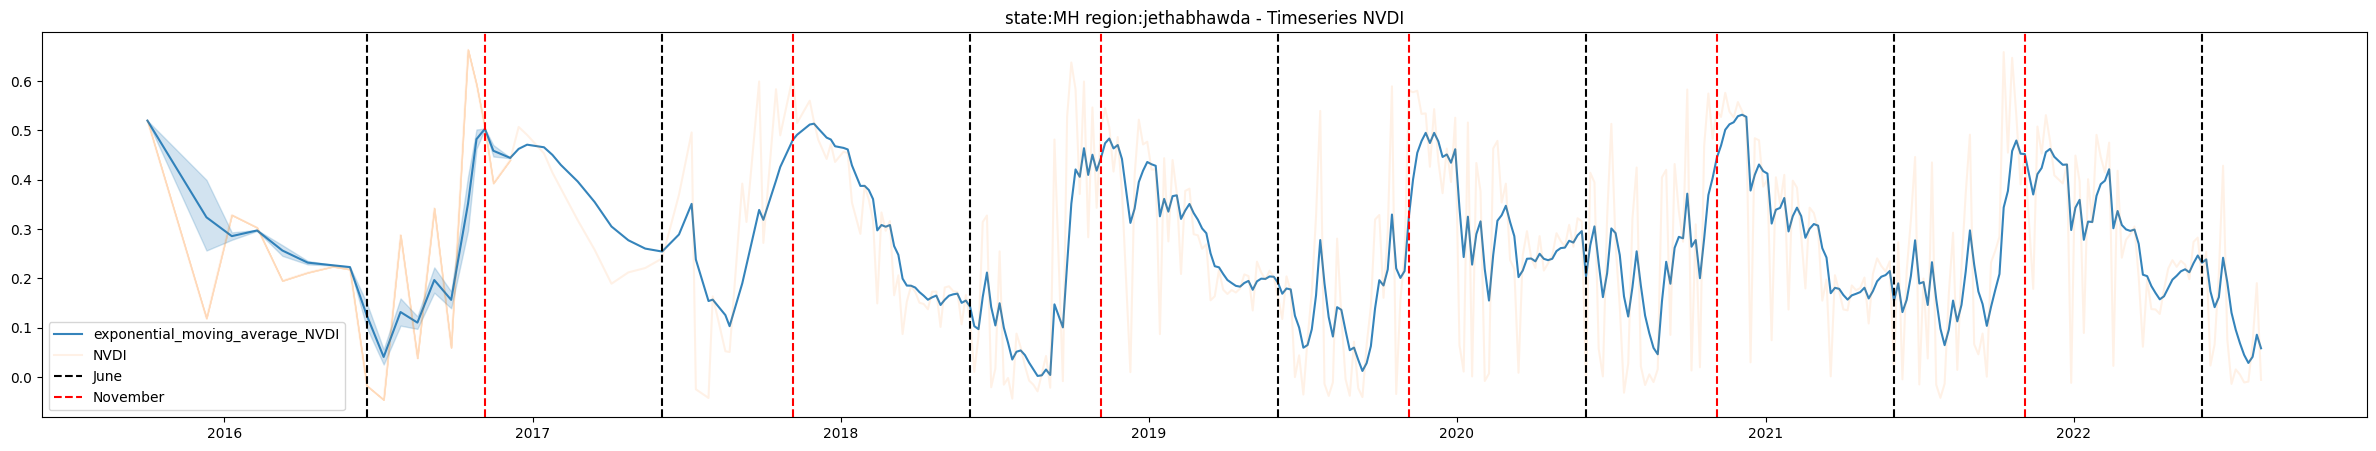

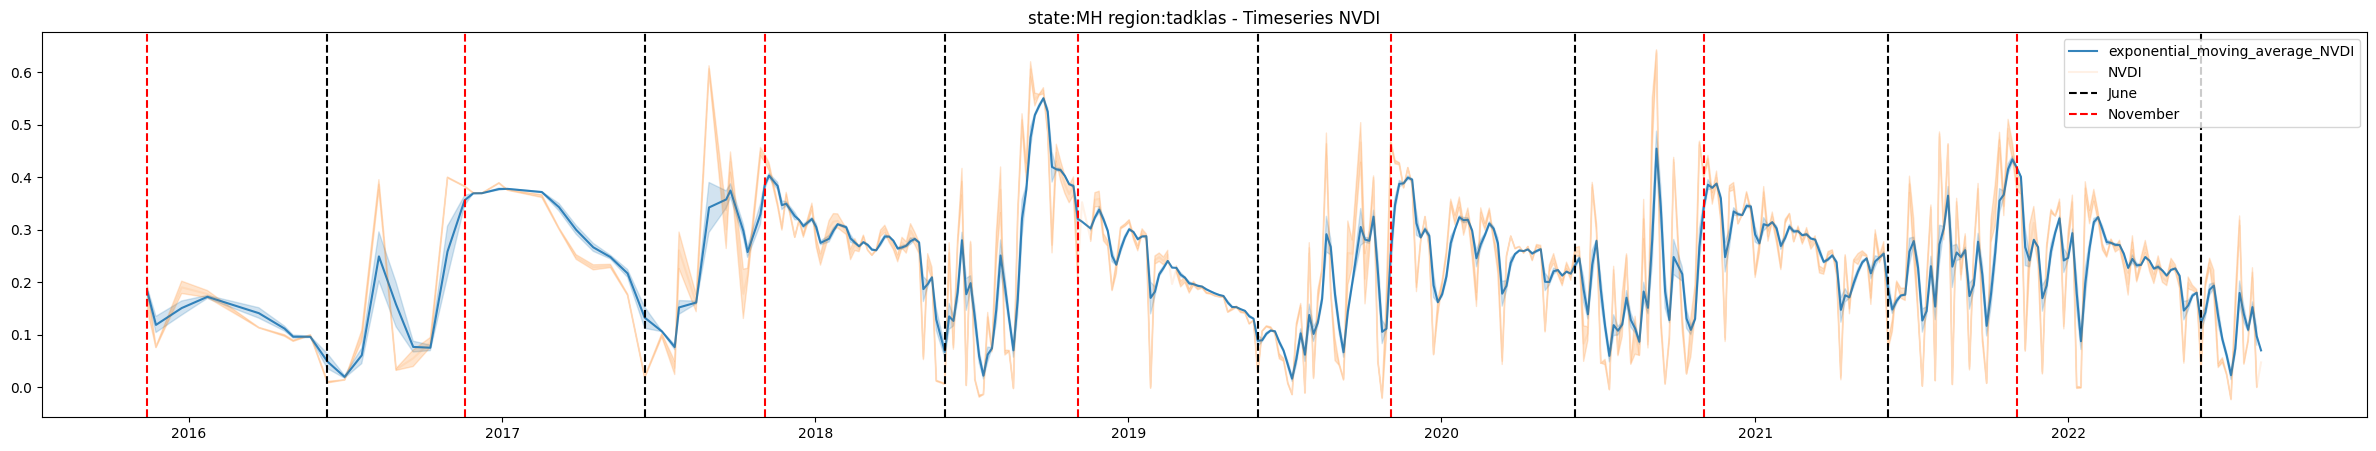

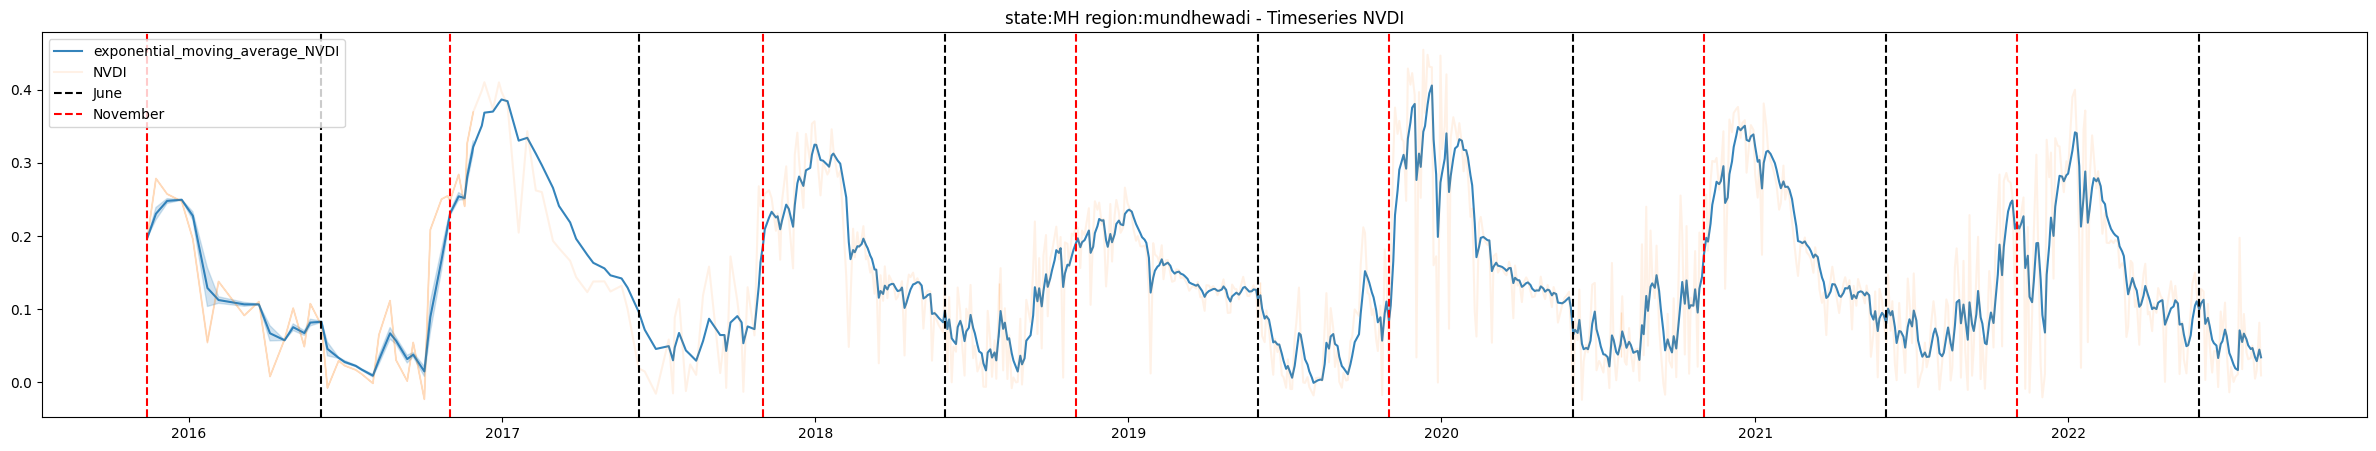

state:MH crop:kharif


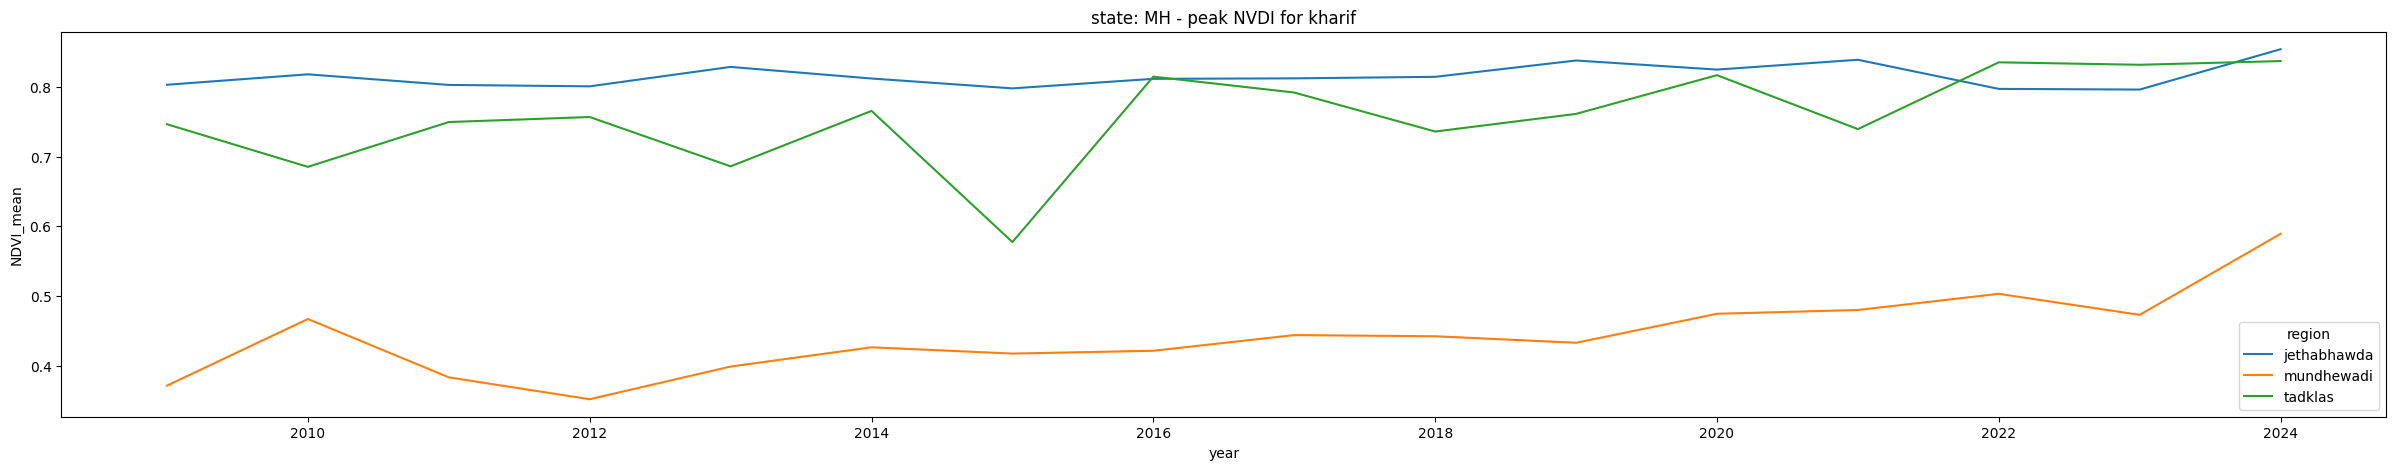

state:MH crop:rabi


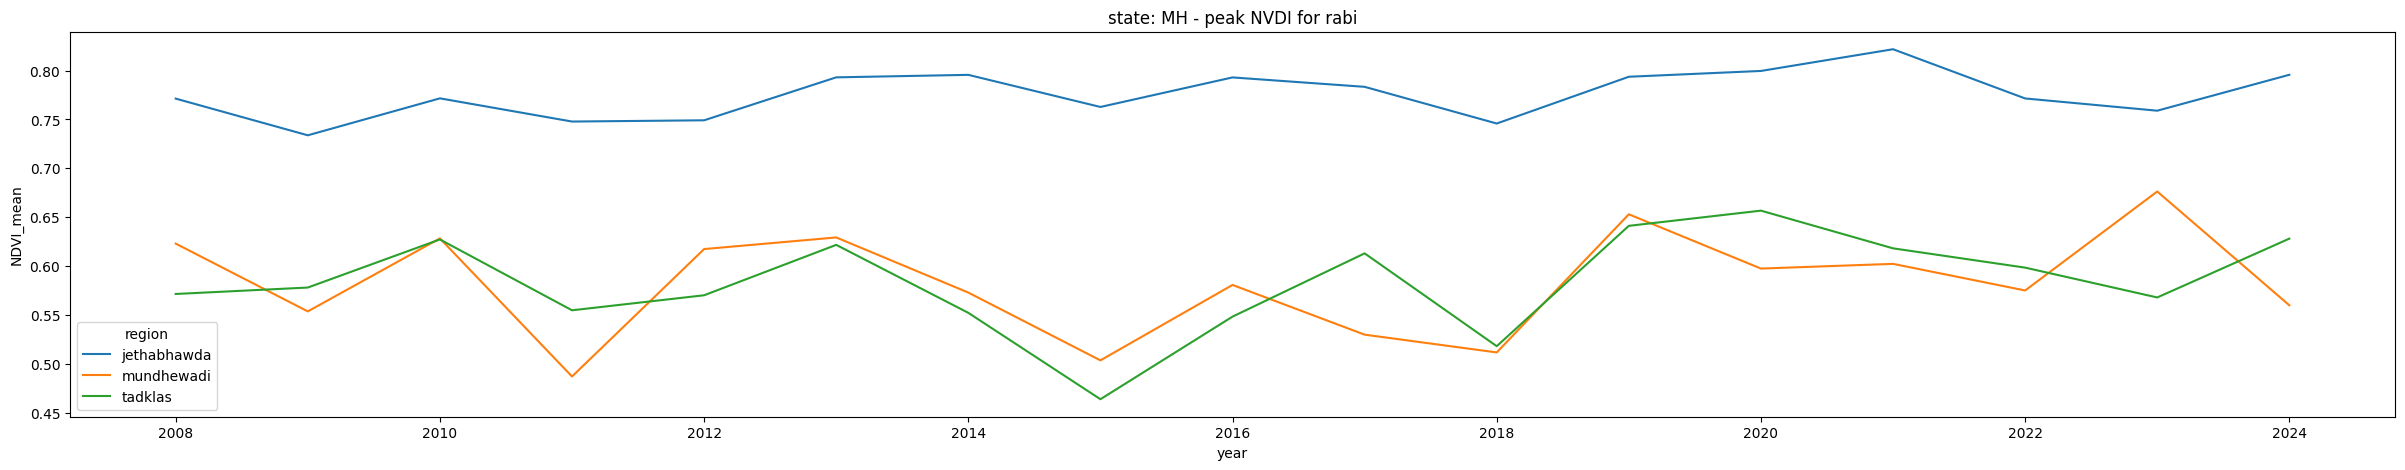

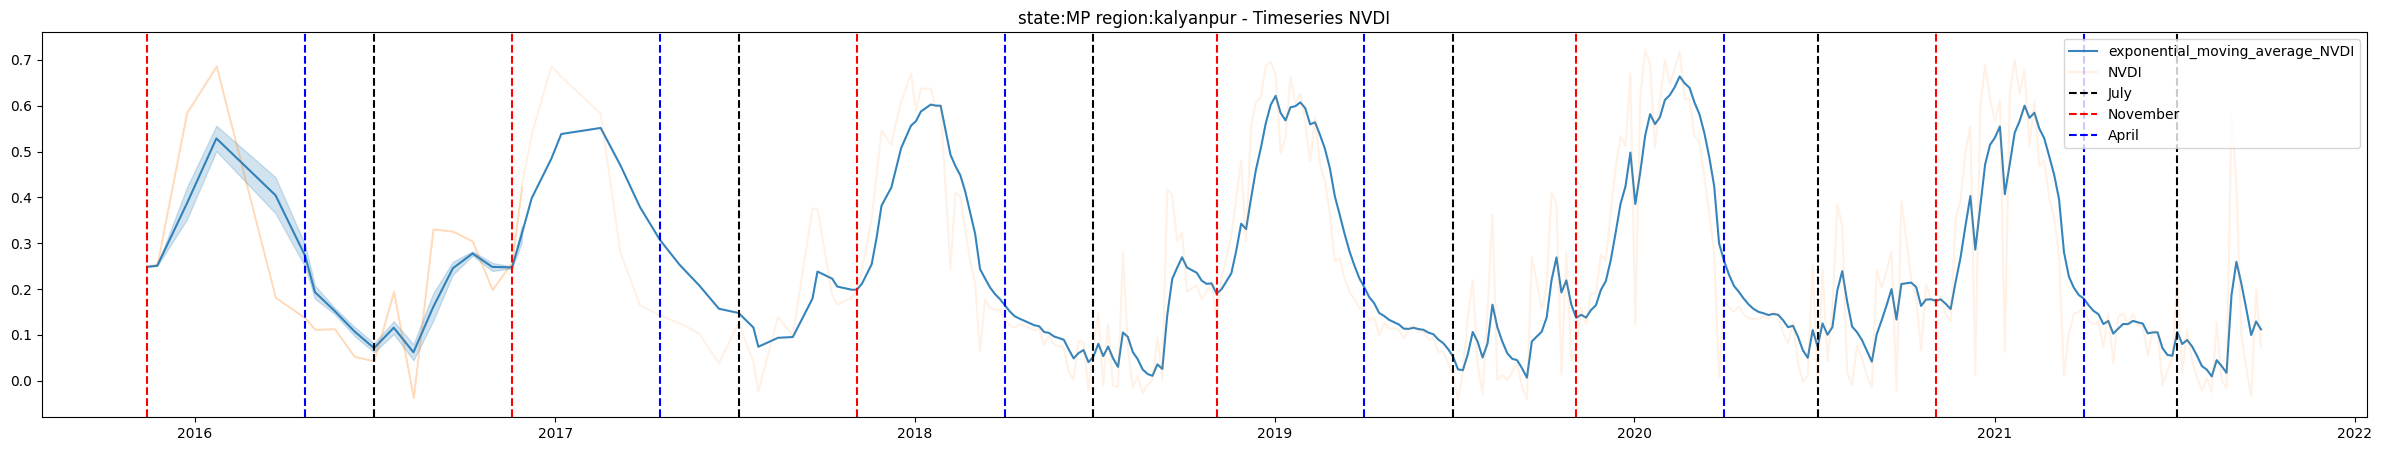

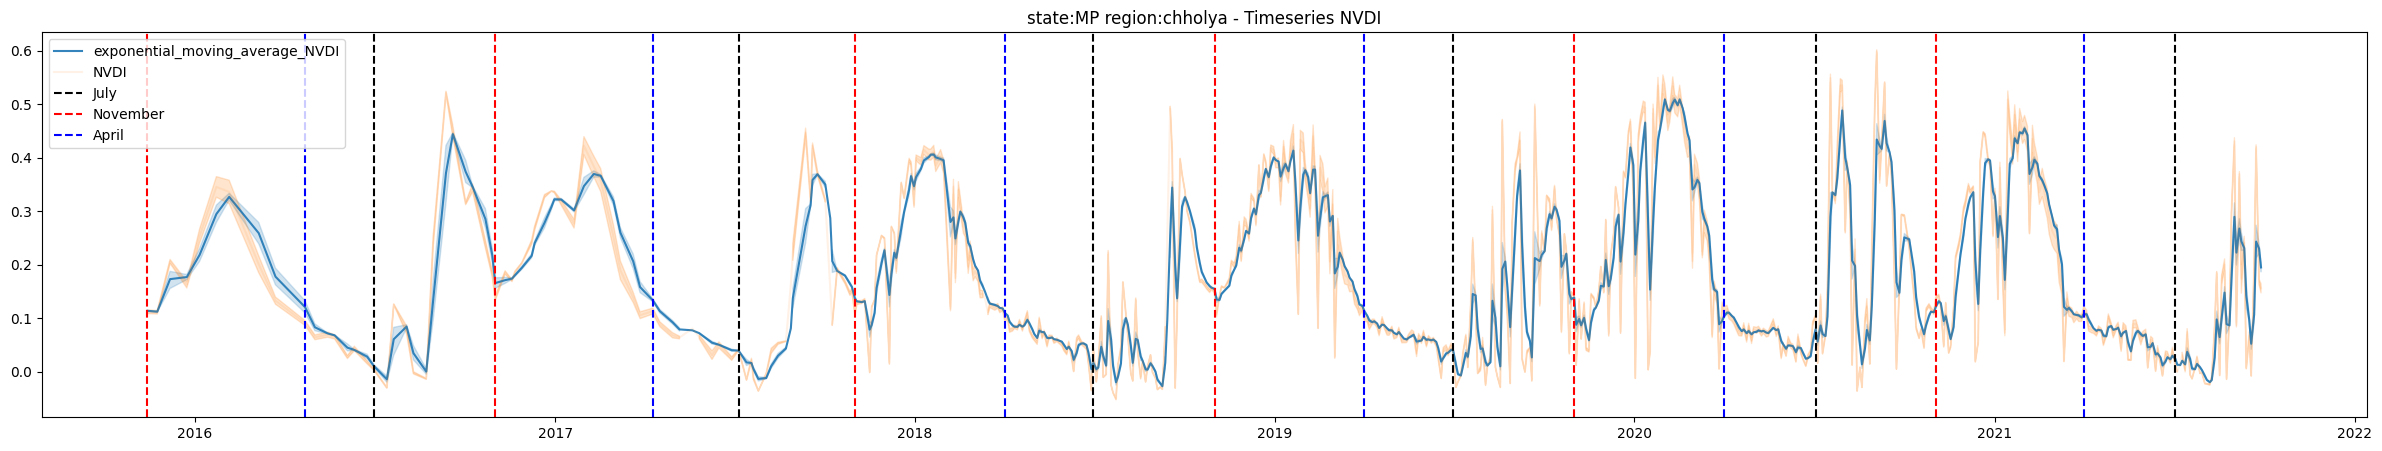

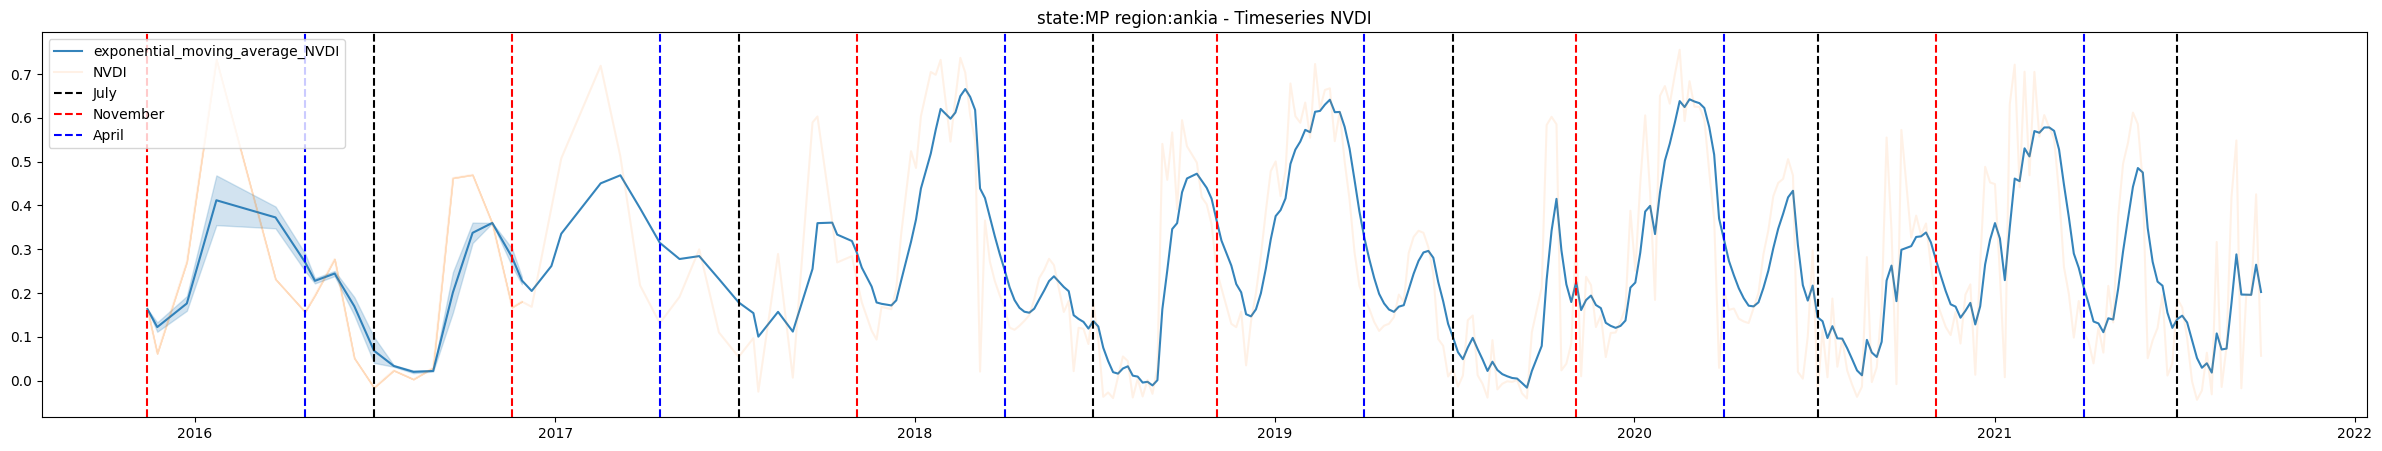

state:MP crop:kharif


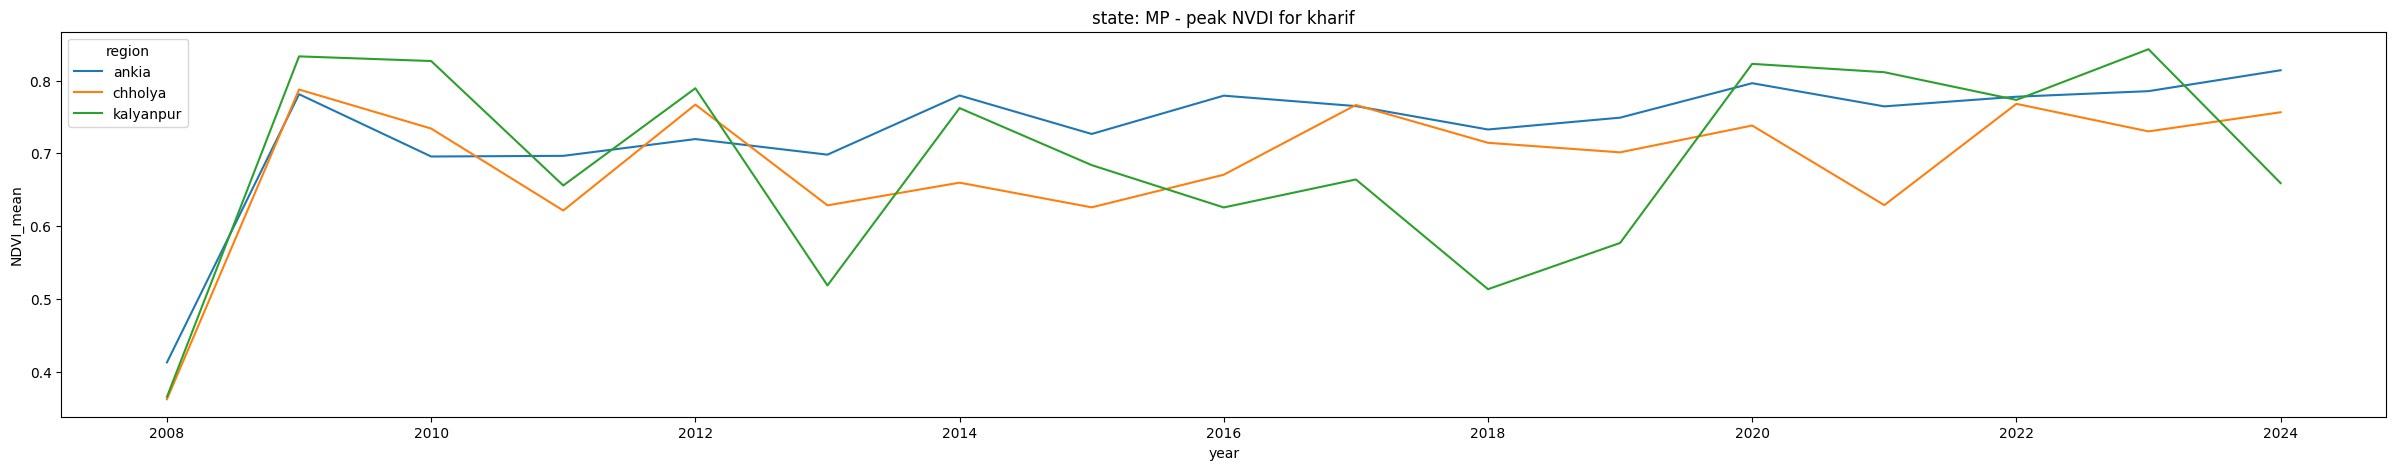

state:MP crop:rabi


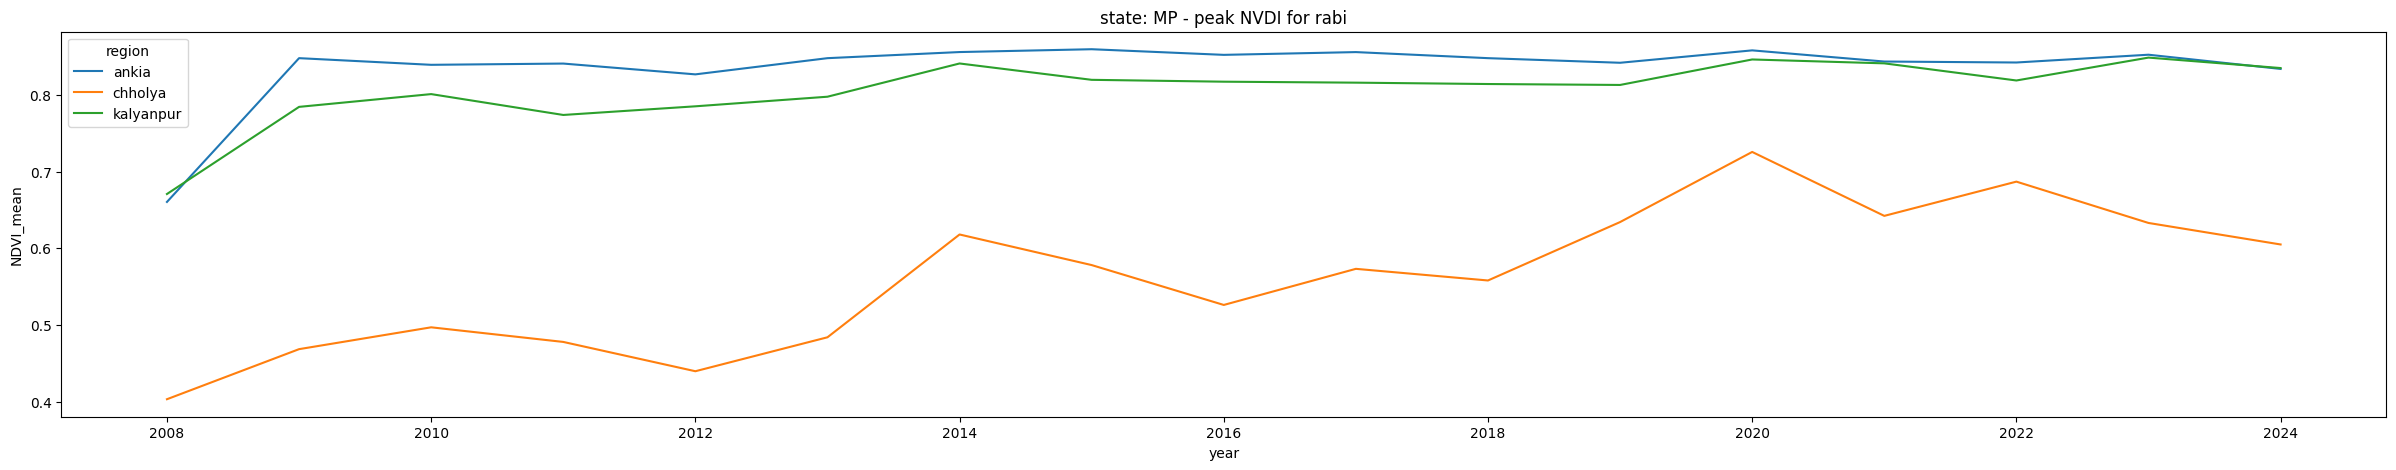

In [12]:
df_1 = data_collection['sentinel'].copy()
df_2 = data_collection['MOD13A1'].groupby(['state','region','year','crop' ])[['NDVI_mean','NDVI_max']].max().reset_index()###peak nvdi


crops = ['kharif','rabi']
state = ['MH','MP']#,'MH']
# state = ['MP']#,'MH']


for s in state:

    df_3 = df_1[(df_1.state == s) ].copy().iloc[:2000]         
    # NDVI_mean plot
    
    for region in df_3.region.unique():

        data = df_3[df_3.region == region]['NDVI_mean'].values
        date = df_3[df_3.region == region]['date'].values
        
        data = np.array(list(data))
        if(s =='MH'):
            alpha = 0.3
        else:
            alpha = 0.3
            
        ema_vals = np.array(ema(data, alpha=alpha))
        
    
        df_3_ = df_3[df_3.region == region]
        df_3_ = df_3_.loc[df_3_[['month','year']].drop_duplicates(keep = 'first').index]
    
        plt.figure(figsize = (30,5))
        sns.lineplot(x =date , y = ema_vals,alpha=0.9,label = 'exponential_moving_average_NVDI')
        sns.lineplot(x =date , y = data,alpha=0.1,label = 'NVDI')
    
        def add_vertical_line(dates,color,label):
            added_label = False
            for d in dates:
                if not added_label:
                    plt.axvline(x=d, color=color, linestyle='--', label=label)
                    added_label = True
                else:
                    plt.axvline(x=d, color=color, linestyle='--')

        if(s == 'MP'):
            months = [7,11,4]
            labels = ['July','November','April']
            colors = ['black','red','blue']
        else:
            months = [6,11]
            labels = ['June','November']
            colors = ['black','red']
            
        
        

        for m ,c ,l in zip(months,colors,labels):
            date_vertical_line = df_3_[df_3_['month'] ==m]['date'].values
            add_vertical_line(date_vertical_line,color = c ,label = l )
    
        plt.legend()
        plt.title(f"state:{s} region:{region} - Timeseries NVDI")
        plt.show()

    for crop in crops:    
        print(f"state:{s} crop:{crop}")
        df_4 = df_2[(df_2.state == s) & (df_2.crop ==crop ) ].copy()

    
        ##peak NVDI year on year
        plt.figure(figsize = (30,5))
        ax = sns.lineplot(data=df_4, x='year', y='NDVI_mean',hue = 'region')
        ax.set_title(f'state: {s} - peak NVDI for {crop}')
        
        plt.show()

- MP region - has clear distinct on kharif and rabi crop
    - Kharif - July - November 
    - Rabi - November - April
- MH region - has continous peak
 - Kharif - July - November
 - rabi   November/Decemeber - May/June

## Precepitation analysis

In [13]:
data_chirps = data_collection['CHIRPS'].copy()

data_chirps['month'] = data_chirps['date'].map(lambda x: x.month)
data_chirps['year'] = data_chirps['date'].map(lambda x: x.year)

# data_chirps['crop'] = data_chirps['month'].map(func_crop)
data_chirps = fun_mark_crop(data_chirps)

data_chirps = data_chirps.sort_values("date")
data_collection['CHIRPS'] = data_chirps

state:MP crop:kharif


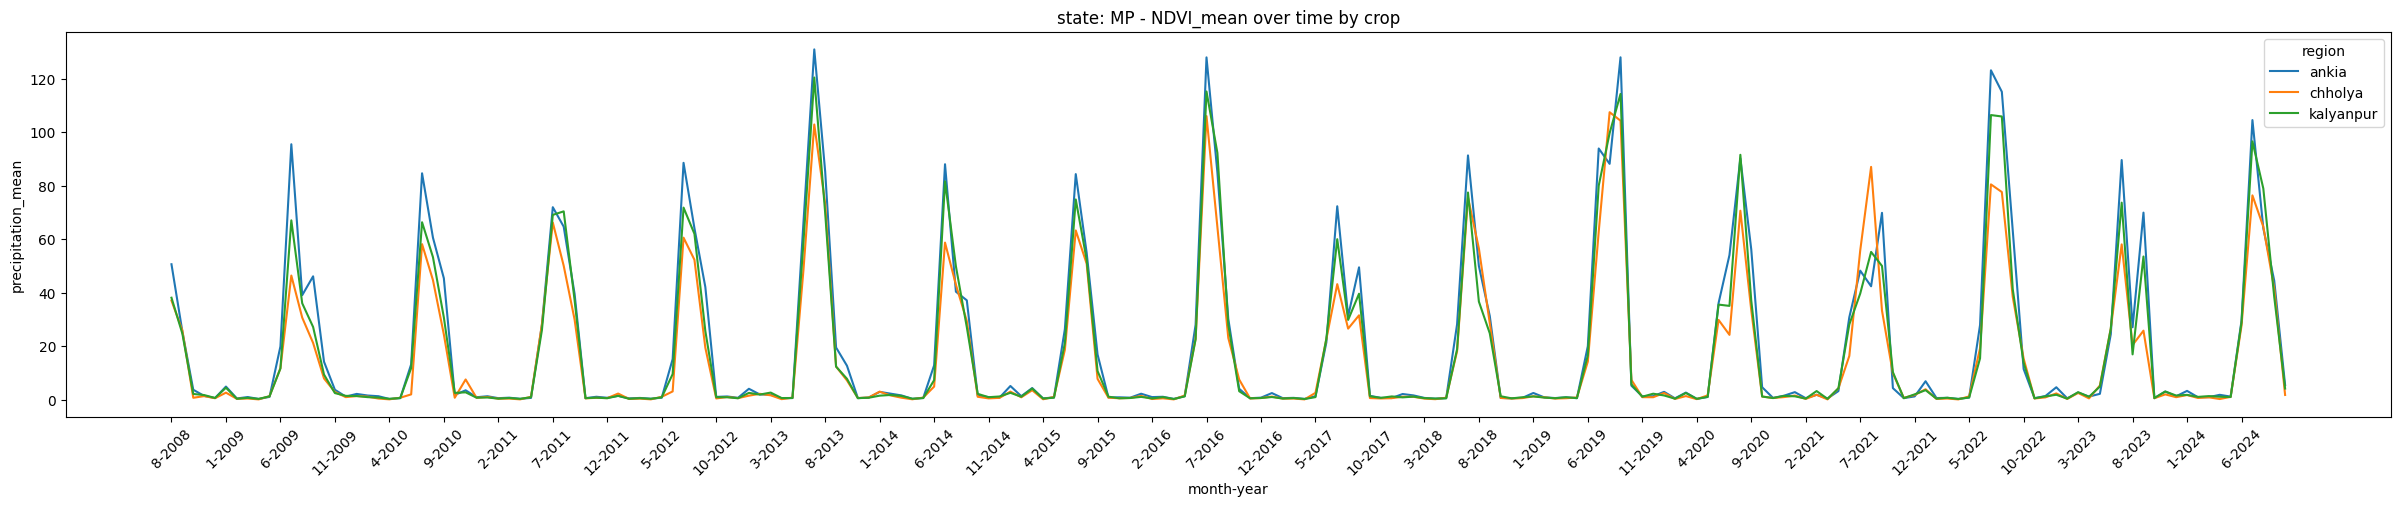

state:MH crop:kharif


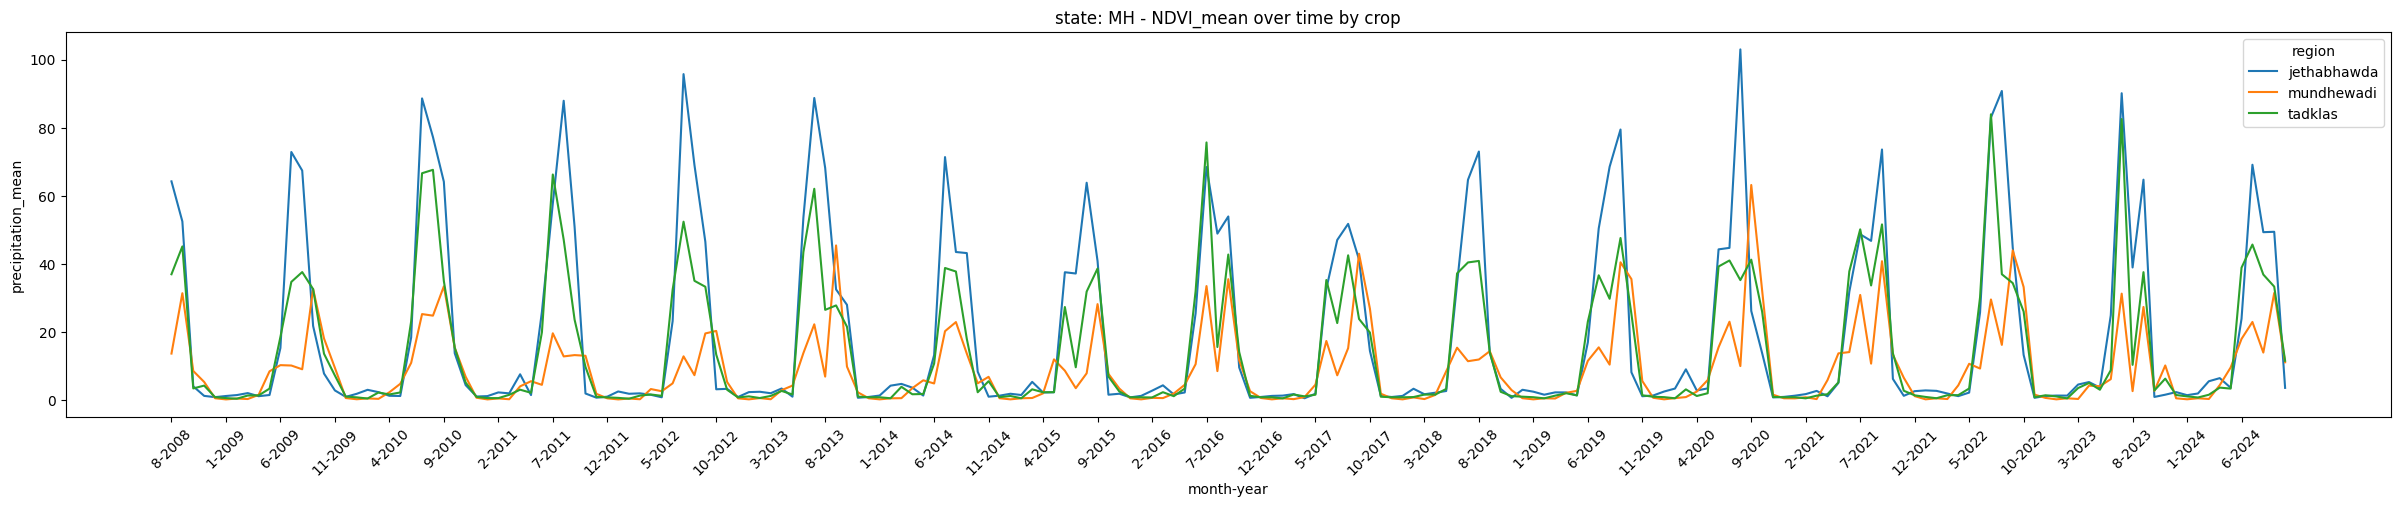

In [16]:
data_chirps_grp =  data_chirps.groupby(['year','month','state','region','crop'])['precipitation_mean'].mean().reset_index().copy()
# data_chirps_grp['month_year']

data_chirps_grp['month-year'] = data_chirps_grp[['month','year']].apply(func = lambda x: str(x[0]) + "-" + str(x[1]) ,axis=1)

crops = ['kharif']
state = ['MP','MH']

for s in state:
    for crop in crops:    
        print(f"state:{s} crop:{crop}")
        df = data_chirps_grp.copy()
        df =  df[(df.state == s)].copy()
        # df_1 =  df[(df.crop ==region)].copy()
            
        # NDVI_mean plot
        plt.figure(figsize = (30,5))
        ax = sns.lineplot(data = df, x='month-year', y='precipitation_mean', hue='region')
        ax.set_title(f'state: {s} - NDVI_mean over time by crop')

        xticks = df['month-year'].unique()[::5]  # every 4th tick
        ax.set_xticks([])
        ax.set_xticks(xticks)
        ax.tick_params(axis='x', rotation=45)

        plt.show()

- MP: During 2013,2016,2022 - There was was heavy rainfall
- MH: 
    -  Mundhewadi had very less precipitation: That is clearly seen this region has no Kharif Peaks.

In [14]:
### Merge NDVI and precipitation data

def func(x,df_2):

    offset = pd.DateOffset(months=0, days=15)
    
    x1 = x.iloc[0] 
    x2 = x.iloc[1]

    if(pd.isna(x1)):
        return np.NaN
    elif(pd.isna(x2)):
        x2 = x1 - offset
    else:
        pass

    df_2 = df_2[(df_2['date'] <=x1) & (df_2['date'] > x2) ]

    mean_val = df_2[['precipitation_max','precipitation_mean', 'precipitation_min', 'precipitation_stdDev']].mean()

    mean_val['date'] = x1

    return mean_val
data_ndvi = data_collection['MOD13A1'].copy()

data_ndvi_pre = []

for (s,r),grp in data_ndvi.groupby(['state','region']):
    grp['prev_date'] = grp['date'].shift(1)
    
    df_2 = data_chirps[(data_chirps['state'] == s) & (data_chirps['region'] == r)].copy()
        
    mean_val =  grp[['date','prev_date','state','region']].apply(lambda x: func(x,df_2) ,axis=1)
    
    mean_val['state'] = s
    mean_val['region'] = r

    data_ndvi_pre.append(mean_val)

data_ndvi_pre = pd.concat(data_ndvi_pre,axis = 0)
data_ndvi_precipitation =  data_ndvi.merge(data_ndvi_pre , on =['date','region','state'])

### Analysis on  NVDI peak over preciptation

In [15]:
### year on year
columns_to_corr = [ 'NDVI_max', 'NDVI_mean','NDVI_min', 'precipitation_max', 'precipitation_mean','precipitation_min']

data_ndvi_year_crop = data_ndvi_precipitation.groupby(['state','region','year','crop',])[[ 'NDVI_max', 'NDVI_mean','NDVI_min', 'precipitation_max', 'precipitation_mean','precipitation_min']].agg(
    NDVI_peak =pd.NamedAgg(column="NDVI_mean", aggfunc="max"),
    precipitation_mean =pd.NamedAgg(column="precipitation_mean", aggfunc="mean"),
    precipitation_max =pd.NamedAgg(column="precipitation_mean", aggfunc="max"),
    precipitation_std =pd.NamedAgg(column="precipitation_mean", aggfunc="std") )

data_ndvi_year_crop = data_ndvi_year_crop.reset_index()

In [16]:
data_ndvi_year_crop[data_ndvi_year_crop.crop == 'kharif'].groupby('state')[['NDVI_peak','precipitation_mean','precipitation_max','precipitation_std']].corr(method = 'pearson')

NDVI_peak  precipitation_mean  precipitation_max  \
state                                                                        
MH    NDVI_peak            1.000000            0.861122           0.739630   
      precipitation_mean   0.861122            1.000000           0.853197   
      precipitation_max    0.739630            0.853197           1.000000   
      precipitation_std    0.655773            0.790803           0.957131   
MP    NDVI_peak            1.000000            0.391582           0.385511   
      precipitation_mean   0.391582            1.000000           0.864270   
      precipitation_max    0.385511            0.864270           1.000000   
      precipitation_std    0.357111            0.814800           0.973891   

                          precipitation_std  
state                                        
MH    NDVI_peak                    0.655773  
      precipitation_mean           0.790803  
      precipitation_max            0.957131  
      precipitation_std            1.000000  
MP    NDVI_peak                    0.357111  
      precipitation_mean           0.814800  
      precipitation_max            0.973891  
      precipitation_std            1.000000

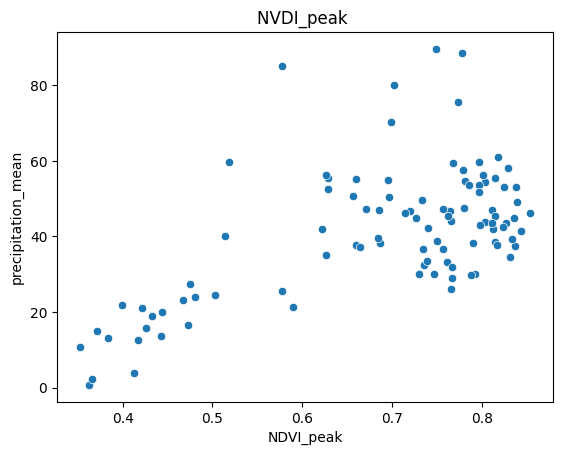

In [17]:
sns.scatterplot(x = 'NDVI_peak',y = 'precipitation_mean',data = data_ndvi_year_crop[data_ndvi_year_crop.crop == 'kharif'] )
plt.title(f"NVDI_peak ")
plt.show()

- NVDI peak is correlating with precipitation 

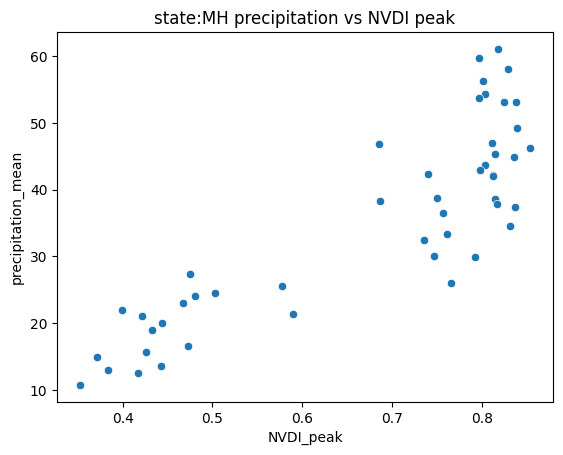

region:jethabhawda
 {'NVDI_peak': 1.0, 'precipitation_mean': -0.03296094341898041, 'precipitation_std': -0.10295944202284003}
region:mundhewadi
 {'NVDI_peak': 1.0, 'precipitation_mean': 0.6093342342239988, 'precipitation_std': 0.2895558937319416}
region:tadklas
 {'NVDI_peak': 1.0, 'precipitation_mean': 0.25343896516580444, 'precipitation_std': 0.3025331967625471}


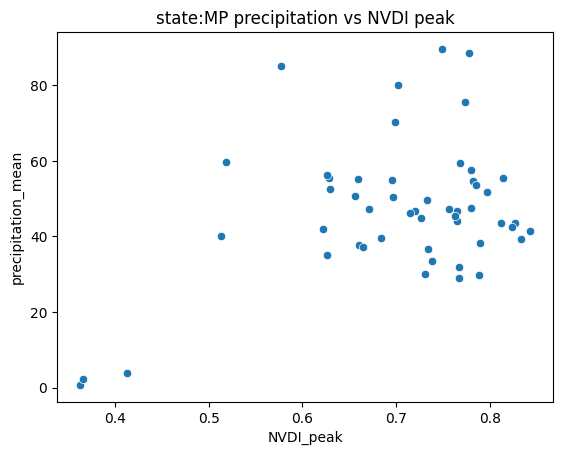

region:ankia
 {'NVDI_peak': 1.0, 'precipitation_mean': 0.6333165313716916, 'precipitation_std': 0.7003937873767907}
region:chholya
 {'NVDI_peak': 1.0, 'precipitation_mean': 0.39135190160073674, 'precipitation_std': 0.2578683551461847}
region:kalyanpur
 {'NVDI_peak': 1.0, 'precipitation_mean': 0.16938443195431488, 'precipitation_std': 0.14056152811403586}


In [60]:

#'EVI_max','EVI_mean', 'EVI_min', 'EVI_stdDev',

columns_to_corr = [ 'NVDI_peak', 'precipitation_mean', 'precipitation_std']


# regions = data_nvdi_precipitation[data_nvdi_precipitation.state == 'MP'].region.unique()


for state  in data_nvdi_year_crop.state.unique():

    df = data_nvdi_year_crop[data_nvdi_year_crop.state == state ].copy()
    
    sns.scatterplot(x = 'NVDI_peak',y = 'precipitation_mean',data = df[ (df.crop == 'kharif')])
    plt.title(f"state:{state} precipitation vs NVDI peak")
    plt.show()

    
    # fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (30,5))

    
    for i,region in enumerate(df.region.unique()):
    
        print(f"region:{region}")
        
        grp = df[ (df.crop == 'kharif') &
                  ( df.region  == region ) ]
        
        corr = grp[columns_to_corr].corr()
    
        print(f"",corr['NVDI_peak'].to_dict())
    
        # sns.scatterplot(x = 'NVDI_peak',y = 'precipitation_mean',data = grp,ax = axis[i])
        # plt.title(f'state:{s} region:{region}- plot ')
        # plt.show()
    
    

- MH show signficant correlation with precipitation, unitl 0.6 and 30mm precipitation and after than it's governerd by other factors.

### Tempreture and Moisutre Analysis

In [17]:
data_era = data_collection['ERA5_LAND'].copy()
data_era['month'] = data_era['date'].map(lambda x:x.month)
data_era['year'] = data_era['date'].map(lambda x:x.year)


data_era["dewpoint_depression"] = data_era["temperature_2m_mean"]  - data_era["dewpoint_temperature_2m_mean"] 
data_era["surface_air_Temp_Diff"] = data_era["skin_temperature_mean"] - data_era["temperature_2m_mean"]  
data_era["ratio_surface_air_temp"]  = 	(data_era["temperature_2m_mean"]   - data_era["dewpoint_temperature_2m_mean"]) / (data_era["skin_temperature_mean"] - data_era["dewpoint_temperature_2m_mean"])


columns_plot = ['temperature_2m_mean','dewpoint_temperature_2m_mean','skin_temperature_mean','soil_temperature_level_1_mean','volumetric_soil_water_layer_1_mean',
               'dewpoint_depression','surface_air_Temp_Diff','ratio_surface_air_temp'
               ]

data_era_month =  data_era.groupby(['region','month','year','state'])[columns_plot].mean()
data_era_month = data_era_month.reset_index().sort_values(['region','month','year','state'])

data_era_month['year_month'] = data_era_month[ ['year','month']].apply(lambda x: str(x[0]) + ' / ' +str(x[1]) ,axis = 1)
data_era_month = data_era_month.sort_values('year_month')

# data_era_month['diff_temp2m_surface'] = (-data_era_month['temperature_2m_mean'] + data_era_month['skin_temperature_mean'])

In [18]:
# data_era_month

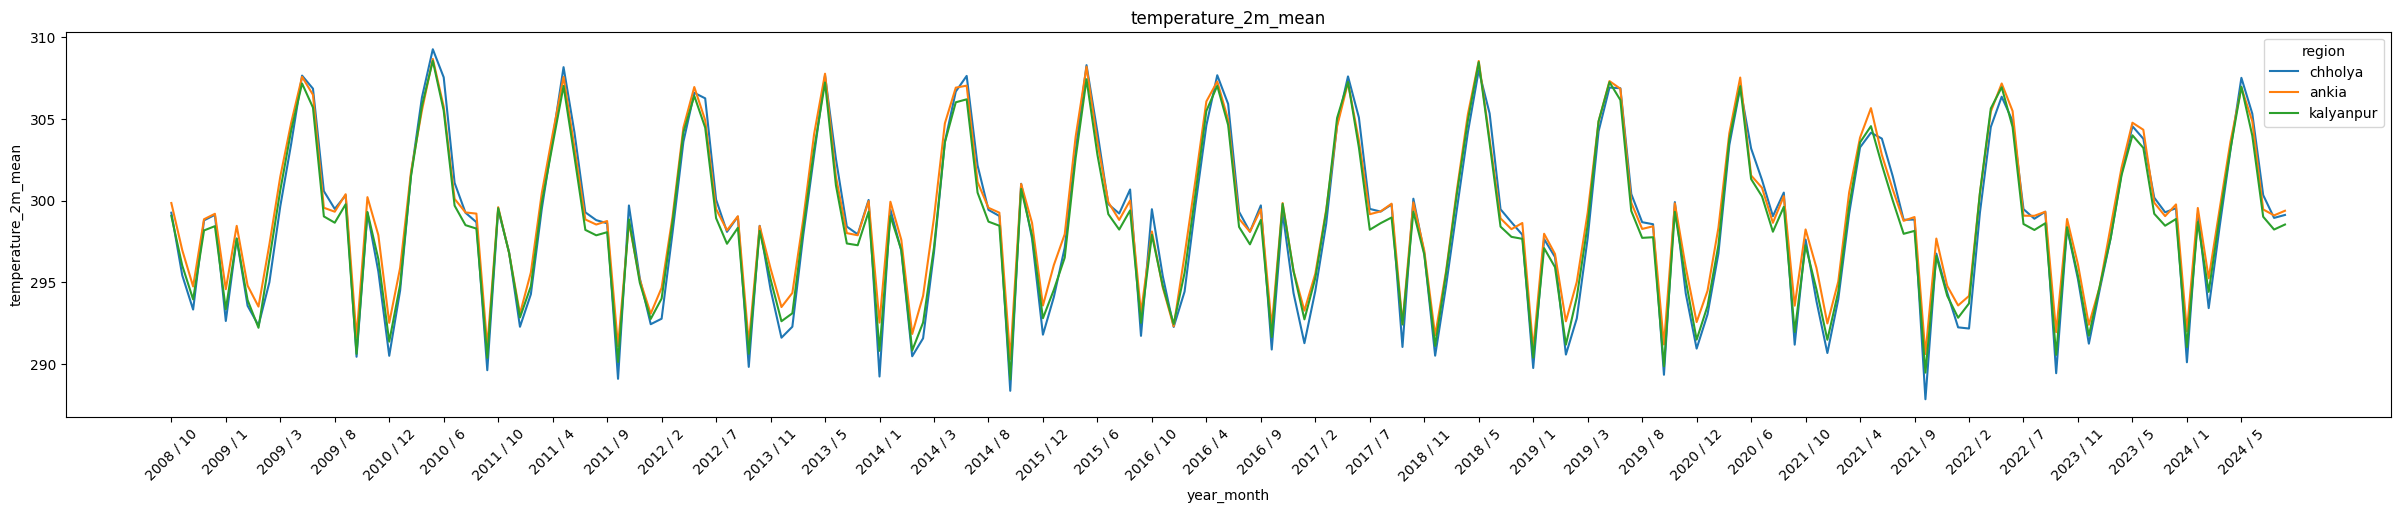

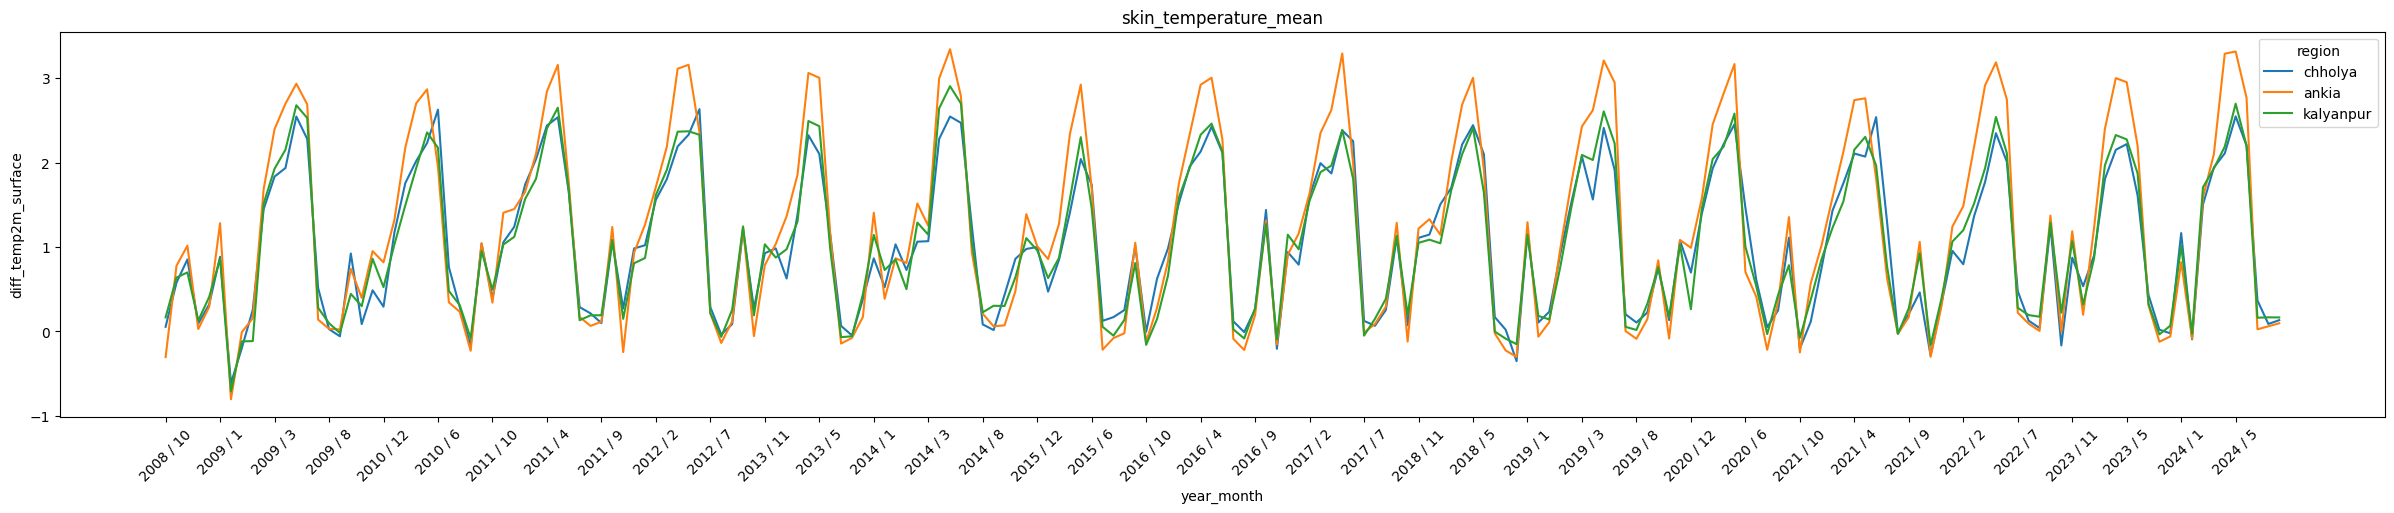

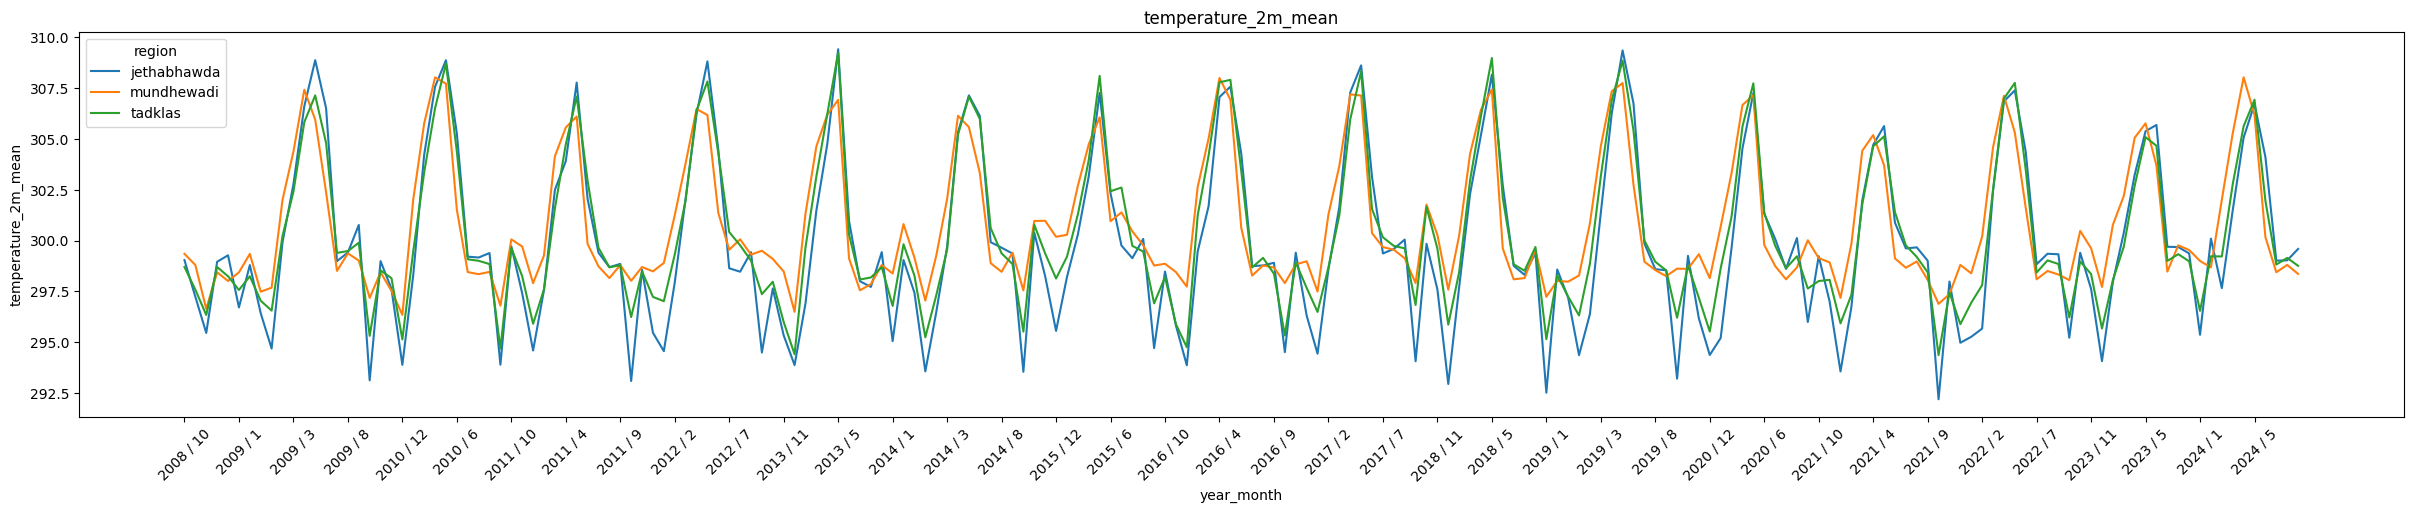

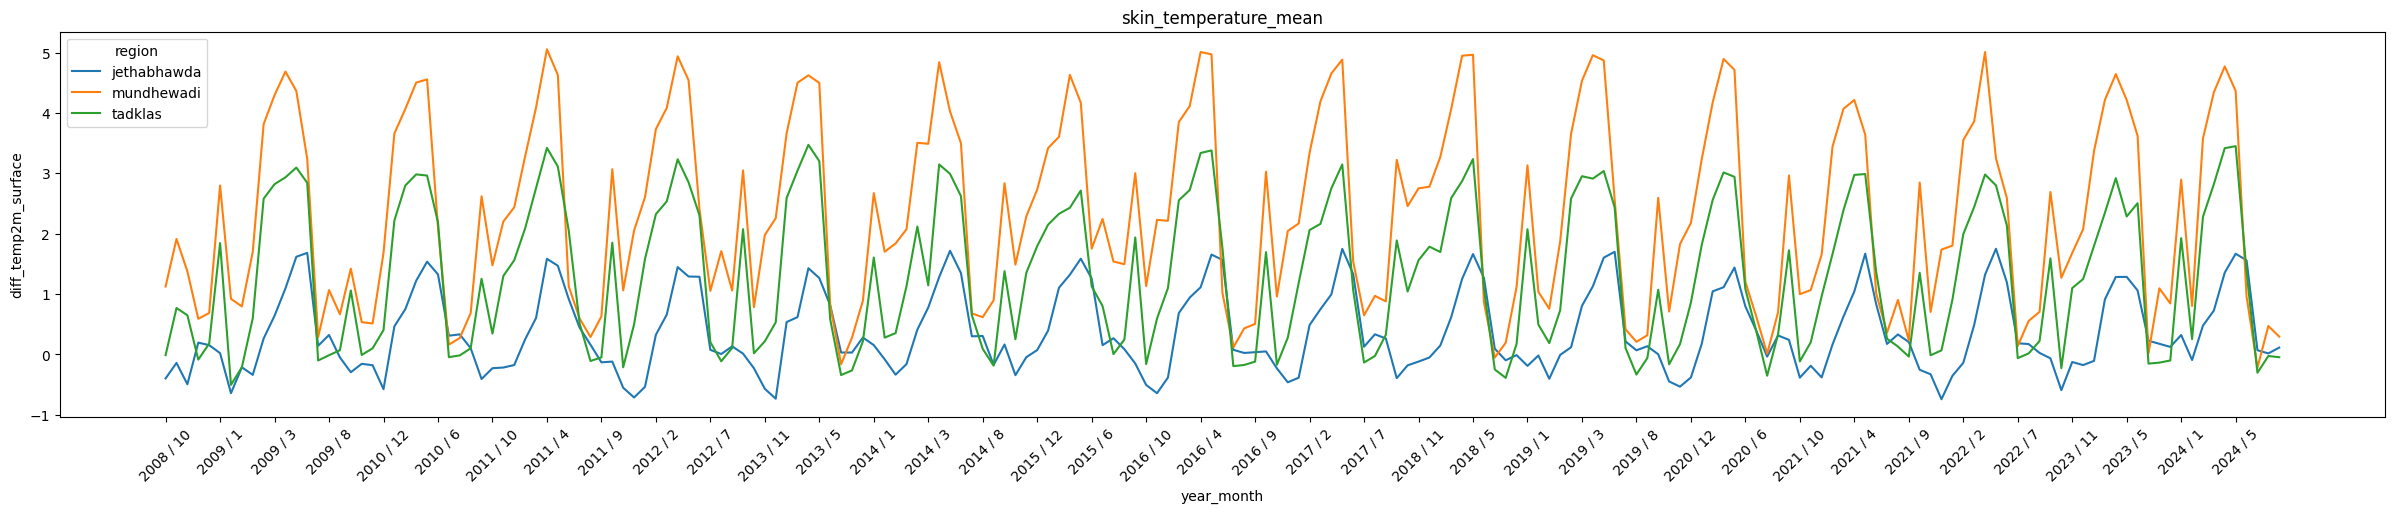

In [28]:
crops = ['kharif','rabi']
state = ['MP','MH']

for s in state:
    # for crop in crops:    
    # print(f"state:{s} crop:{crop}")
        
    # tempreture plot
    plt.figure(figsize = (30,5))
    ax = sns.lineplot(data=data_era_month[data_era_month.state == s], x='year_month', y='temperature_2m_mean', hue='region')
    ax.set_title(f'state: {s} - temperature_plot')

    xticks = list(data_era_month[data_era_month.state == s]['year_month'].unique()[::5])
    
    plt.xticks(xticks,rotation=45)
    plt.title('temperature_2m_mean')
    plt.show()

    # tempreture plot
    plt.figure(figsize = (30,5))
    ax = sns.lineplot(data=data_era_month[data_era_month.state == s], x='year_month', y='diff_temp2m_surface', hue='region')
    ax.set_title(f'state: {s} - temperature_plot')

    xticks = list(data_era_month[data_era_month.state == s]['year_month'].unique()[::5])
    
    plt.xticks(xticks,rotation=45)
    plt.title('skin_temperature_mean')
    plt.show()

In [19]:

### merge all data sets

def func(x,df_2):

    offset = pd.DateOffset(months=0, days=15)
    
    x1 = x.iloc[0] 
    x2 = x.iloc[1]

    if(pd.isna(x1)):
        return np.NaN
    elif(pd.isna(x2)):
        x2 = x1 - offset
    else:
        pass

    df_2 = df_2[(df_2['date'] <=x1) & (df_2['date'] > x2) ]

    columns = ['temperature_2m_mean','dewpoint_temperature_2m_mean','skin_temperature_mean', 'soil_temperature_level_1_mean', 'soil_temperature_level_2_mean','soil_temperature_level_3_mean',
  'soil_temperature_level_4_mean', 'surface_pressure_mean','volumetric_soil_water_layer_1_mean','volumetric_soil_water_layer_2_mean','volumetric_soil_water_layer_3_mean','volumetric_soil_water_layer_4_mean',
 'dewpoint_depression','surface_air_Temp_Diff','ratio_surface_air_temp']
    
    mean_val = df_2[columns].mean()

    mean_val['date'] = x1

    return mean_val


data_merged = []

for (s,r),grp in data_ndvi_precipitation.groupby(['state','region']):
    grp['prev_date'] = grp['date'].shift(1)
    
    df_2 = data_era[(data_era['state'] == s) & (data_era['region'] == r)].copy()
        
    mean_val =  grp[['date','prev_date','state','region']].apply(lambda x: func(x,df_2) ,axis=1)
    
    mean_val['state'] = s
    mean_val['region'] = r

    data_merged.append(mean_val)

data_merged = pd.concat(data_merged,axis = 0)
# data_nvdi_precipitation =  data_nvdi.merge(data_ndvi_pre , on =['date','region','state'])
data_merged =  data_ndvi_precipitation.merge(data_merged , on =['date','region','state'])

### Plot on Temp, Volumetric soil

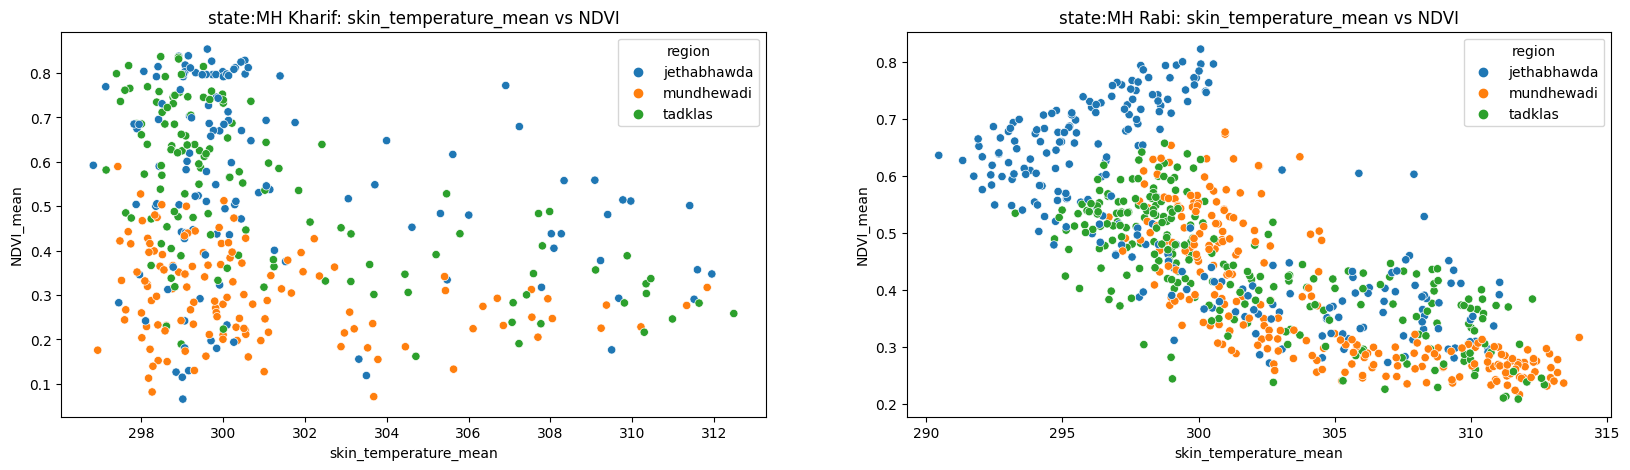

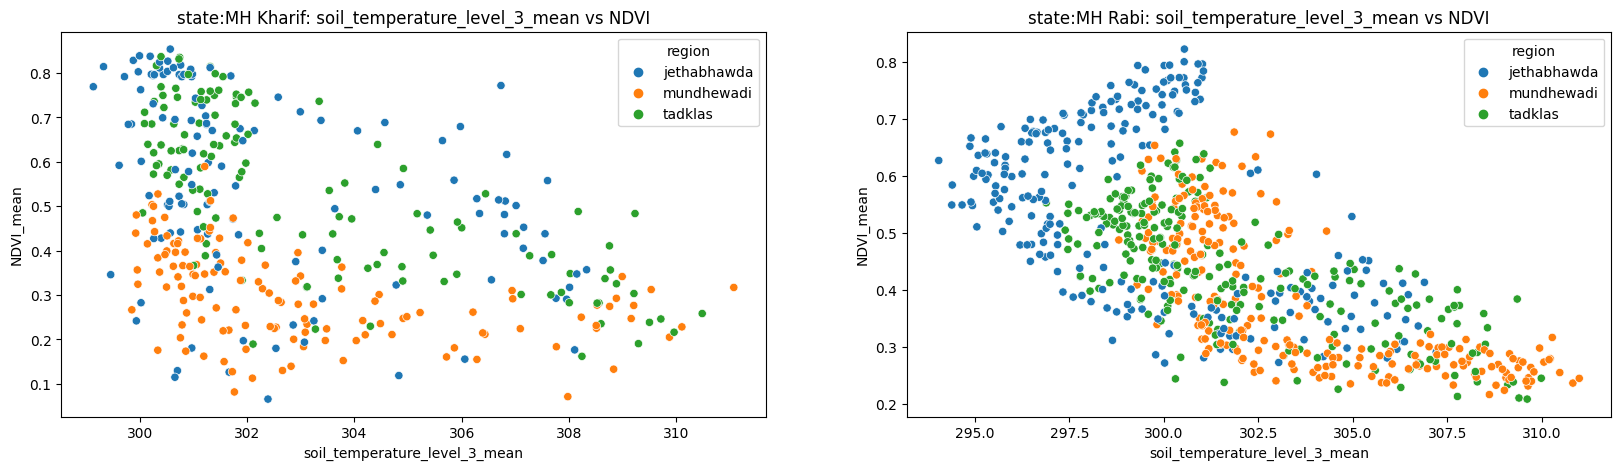

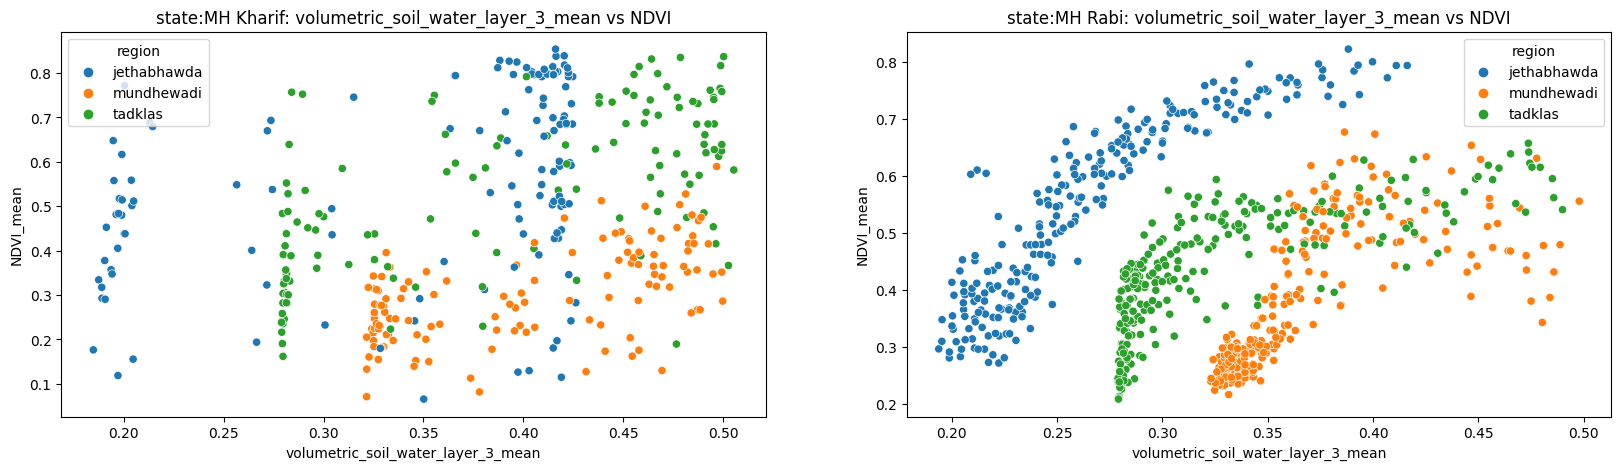

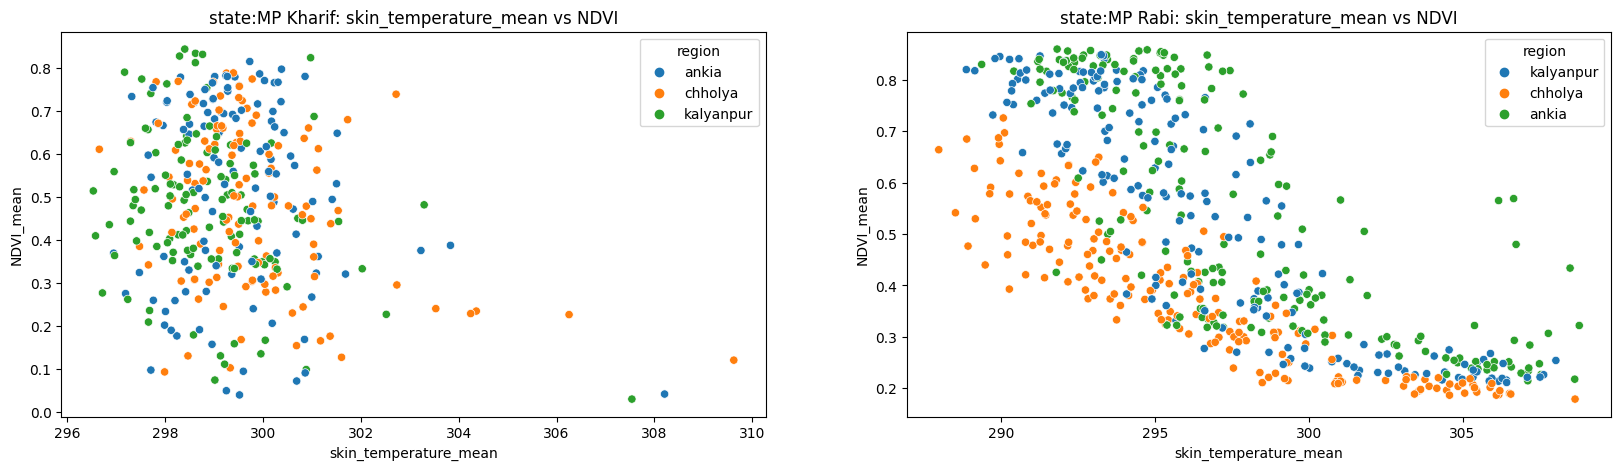

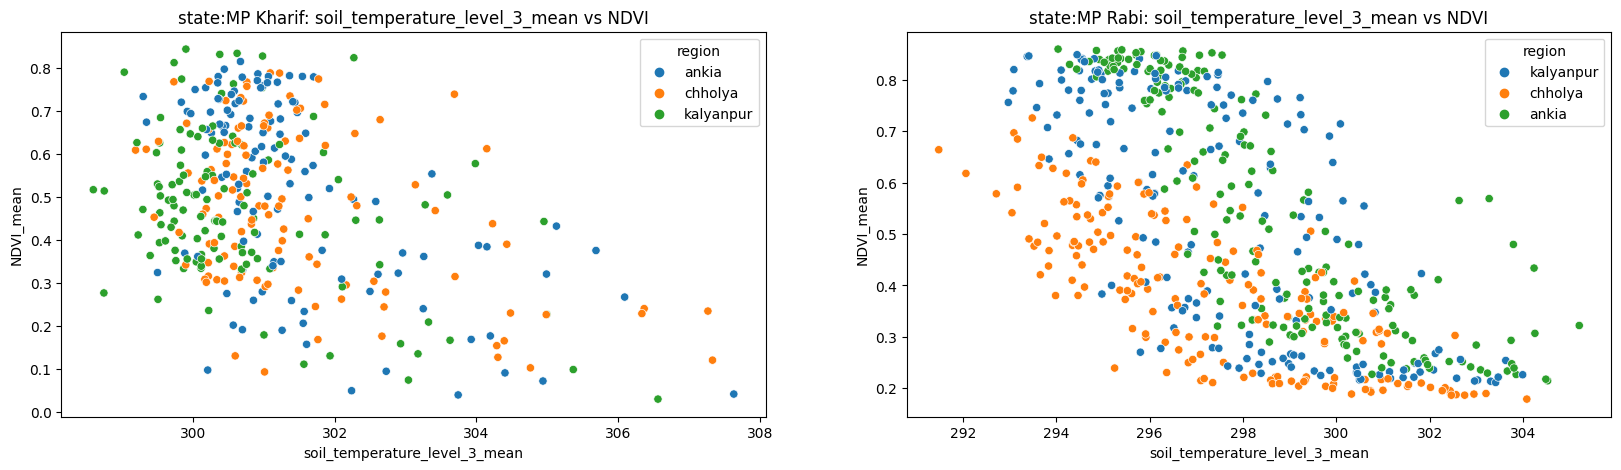

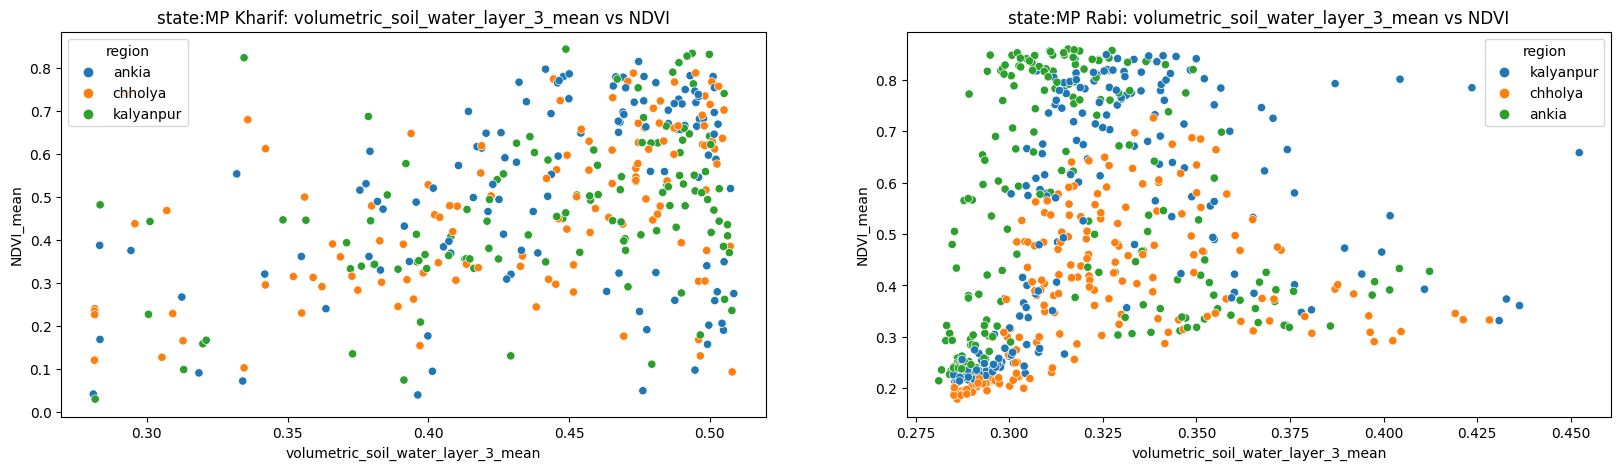

In [21]:
columns_to_corr = [ 'NDVI_max', 'NDVI_mean','NDVI_min'] + ['temperature_2m_mean','dewpoint_temperature_2m_mean','skin_temperature_mean', 'soil_temperature_level_1_mean', 'soil_temperature_level_2_mean','soil_temperature_level_3_mean',
  'soil_temperature_level_4_mean', 'surface_pressure_mean','volumetric_soil_water_layer_1_mean','volumetric_soil_water_layer_2_mean','volumetric_soil_water_layer_3_mean','volumetric_soil_water_layer_4_mean']
    

columns_plot = ['skin_temperature_mean','soil_temperature_level_3_mean','volumetric_soil_water_layer_3_mean',]


for state in data_merged.state.unique():

    grp = data_merged[(data_merged.state == state ) ]
    # corr = grp[columns_to_corr].corr()

    # print(corr['NDVI_mean'].to_dict())
    
    for col in columns_plot:
        
        fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
    
        sns.scatterplot(data =  grp[ (grp.crop == 'kharif')], x =  col ,y = 'NDVI_mean',ax = axes[0],hue='region')
        sns.scatterplot(data =  grp[ (grp.crop == 'rabi')], x = col ,y = 'NDVI_mean',ax = axes[1],hue='region')
        
        axes[0].set_title(f'state:{state} Kharif: {col} vs NDVI')
        axes[1].set_title(f'state:{state} Rabi: {col} vs NDVI')
        
        plt.show()
    print('\n\n\n')
        

In [22]:
columns = ['NDVI_mean','EVI_mean'] + ['precipitation_mean','temperature_2m_mean','dewpoint_temperature_2m_mean','skin_temperature_mean', 'soil_temperature_level_1_mean', 'soil_temperature_level_2_mean','soil_temperature_level_3_mean',
  'soil_temperature_level_4_mean', 'surface_pressure_mean','volumetric_soil_water_layer_1_mean','volumetric_soil_water_layer_2_mean','volumetric_soil_water_layer_3_mean','volumetric_soil_water_layer_4_mean',
  'dewpoint_depression','surface_air_Temp_Diff','ratio_surface_air_temp']
    
corr = data_merged[data_merged.crop !="nocrop"].groupby(['state','region','crop'])[columns].corr(method = 'spearman')[["EVI_mean","NDVI_mean"]]
corr = corr.loc[[i for i in corr.index if (i[-1] not in ['EVI_mean','NDVI_mean'] ) ]]

* Select Feature above 0.6 correlation.

In [24]:
pd.set_option("display.max_rows",100)
corr = corr[(np.abs(corr['NDVI_mean'])>0.6) | (np.abs(corr['EVI_mean'])>0.6)]
corr

EVI_mean  \
state region      crop                                                  
MH    jethabhawda kharif soil_temperature_level_4_mean      -0.611169   
                         volumetric_soil_water_layer_4_mean  0.627993   
                  rabi   volumetric_soil_water_layer_1_mean  0.737807   
                         volumetric_soil_water_layer_2_mean  0.835457   
                         volumetric_soil_water_layer_3_mean  0.877224   
                         volumetric_soil_water_layer_4_mean  0.873363   
                         dewpoint_depression                -0.858495   
                         surface_air_Temp_Diff              -0.718841   
      mundhewadi  kharif soil_temperature_level_4_mean      -0.666648   
                         volumetric_soil_water_layer_3_mean  0.625681   
                         volumetric_soil_water_layer_4_mean  0.616920   
                  rabi   temperature_2m_mean                -0.782975   
                         skin_temperature_mean              -0.825953   
                         soil_temperature_level_1_mean      -0.828818   
                         soil_temperature_level_2_mean      -0.826330   
                         soil_temperature_level_3_mean      -0.800639   
                         volumetric_soil_water_layer_2_mean  0.810662   
                         volumetric_soil_water_layer_3_mean  0.842076   
                         dewpoint_depression                -0.773677   
                         surface_air_Temp_Diff              -0.831518   
                         ratio_surface_air_temp              0.724422   
      tadklas     kharif temperature_2m_mean                -0.633732   
                         skin_temperature_mean              -0.635747   
                         soil_temperature_level_1_mean      -0.678819   
                         soil_temperature_level_2_mean      -0.718544   
                         soil_temperature_level_3_mean      -0.729211   
                         soil_temperature_level_4_mean      -0.560743   
                         volumetric_soil_water_layer_3_mean  0.679666   
                         dewpoint_depression                -0.621069   
                         surface_air_Temp_Diff              -0.617921   
                  rabi   temperature_2m_mean                -0.611591   
                         skin_temperature_mean              -0.691745   
                         soil_temperature_level_1_mean      -0.691253   
                         soil_temperature_level_2_mean      -0.685620   
                         soil_temperature_level_3_mean      -0.645672   
                         volumetric_soil_water_layer_2_mean  0.714079   
                         volumetric_soil_water_layer_3_mean  0.814815   
                         volumetric_soil_water_layer_4_mean  0.689735   
                         dewpoint_depression                -0.786956   
                         surface_air_Temp_Diff              -0.764836   
MP    ankia       rabi   temperature_2m_mean                -0.737209   
                         skin_temperature_mean              -0.699115   
                         soil_temperature_level_1_mean      -0.726158   
                         soil_temperature_level_2_mean      -0.758524   
                         soil_temperature_level_3_mean      -0.829401   
                         surface_pressure_mean               0.573292   
      chholya     rabi   temperature_2m_mean                -0.899947   
                         skin_temperature_mean              -0.891641   
                         soil_temperature_level_1_mean      -0.897818   
                         soil_temperature_level_2_mean      -0.900256   
                         soil_temperature_level_3_mean      -0.815868   
                         surface_pressure_mean               0.800828   
                         dewpoint_depression                -0.736079   
      kalyanpur   rabi   temperature_2m_mean  

**Kharif Season Observations:**

- Surface-Air Temperature Difference and Soil Temperature at Level 4 (mean) are negatively correlated with NDVI.

- Soil moisture volume is positively correlated with NDVI.

- This is expected — higher surface-air temperature differences indicate more heat stress on crops.
- Similarly, higher soil moisture supports healthier vegetation, leading to higher NDVI.

**Rabi Season Observations:**

- Surface-Air Temperature Difference and Soil Temperature at Level 4 (mean) are negatively correlated with NDVI.

- The Surface-Air Temperature Ratio is positively correlated, which suggests that when the surface temperature is closer to the dew point, vapor near the surface condenses, increasing moisture availability.

-  Similarly, soil moisture volume shows a positive correlation with NDVI, indicating that higher moisture supports healthier crop growth.

In [26]:
selected_feature = corr.reset_index()['level_3'].unique()

selected_feature_str = '\n'.join(selected_feature)

print(f"selected_feature\n{selected_feature_str}")

selected_feature
soil_temperature_level_4_mean
volumetric_soil_water_layer_4_mean
volumetric_soil_water_layer_1_mean
volumetric_soil_water_layer_2_mean
volumetric_soil_water_layer_3_mean
dewpoint_depression
surface_air_Temp_Diff
temperature_2m_mean
skin_temperature_mean
soil_temperature_level_1_mean
soil_temperature_level_2_mean
soil_temperature_level_3_mean
ratio_surface_air_temp
surface_pressure_mean


### Relative Comparison of NDVI

**Compare low NDVI with high NDVI periods to analyze how climatic factors or changes contribute to a decrease in NDVI.**

In [27]:
columns = ['NDVI_mean','EVI_mean'] + ['precipitation_mean','temperature_2m_mean','dewpoint_temperature_2m_mean','skin_temperature_mean', 'soil_temperature_level_1_mean', 'soil_temperature_level_2_mean','soil_temperature_level_3_mean',
  'soil_temperature_level_4_mean', 'surface_pressure_mean','volumetric_soil_water_layer_1_mean','volumetric_soil_water_layer_2_mean','volumetric_soil_water_layer_3_mean','volumetric_soil_water_layer_4_mean']


columns = ['NDVI_mean','EVI_mean'] + list(selected_feature)


data_merged_ndvi_peak =  data_merged.groupby(['region','state','year','crop']).agg(

    NDVI_peak = pd.NamedAgg(column = 'NDVI_mean',aggfunc = 'max') , 
    precipitation_mean = pd.NamedAgg(column = 'precipitation_mean',aggfunc = 'mean'),
     **{col:pd.NamedAgg(column = col,aggfunc = 'mean') for col in selected_feature}
    
)

data_merged_ndvi_peak = data_merged_ndvi_peak.reset_index()

In [29]:
# data_merged_ndvi_peak[(data_merged_ndvi_peak['year'] < 2024) &
#                                (data_merged_ndvi_peak.state == 'MH')  &
#                                (data_merged_ndvi_peak.region == 'tadklas')&
#                                 (data_merged_ndvi_peak.NDVI_peak > 0.6)].copy()

In [30]:
columns = ['NDVI_peak', 'precipitation_mean'] + list(selected_feature)

columns_best = [col + '_best' for col in columns]
columns_diff = [col + '_diff' for col in columns]

##cross join
data_merged_ndvi_peak_compare =  data_merged_ndvi_peak.merge(data_merged_ndvi_peak,on = ['region','state','crop',],suffixes = ("","_best"),how = 'inner',)
# data_merged_nvdi_peak_compare  = data_merged_nvdi_peak_compare[data_merged_nvdi_peak_compare['NDVI_peak'] < data_merged_nvdi_peak_compare['NDVI_peak_best']]
data_merged_ndvi_peak_compare = data_merged_ndvi_peak_compare.reset_index(drop = True)


data_diff =  -data_merged_ndvi_peak_compare[columns_best].values + data_merged_ndvi_peak_compare[columns].values
df_diff = pd.DataFrame(data_diff,columns = columns_diff )

data_merged_ndvi_peak_compare = pd.concat([data_merged_ndvi_peak_compare  , df_diff] ,axis=1 , ignore_index = False )


###filter out

columns_location = ['region', 'state', 'year', 'crop']

data_merged_ndvi_peak_compare = data_merged_ndvi_peak_compare[(data_merged_ndvi_peak_compare['NDVI_peak_diff'] < -0.1) & 
                                   (data_merged_ndvi_peak_compare['crop'] !='nocrop')][columns_location + ['NDVI_peak','NDVI_peak_best','year_best'] + columns_diff ]

# data_merged_ndvi_peak_compare


In [32]:
# df.groupby( ['region', 'state', 'year', 'crop'])

data_merged_compare = []
data_merged_ndvi_peak_compare = data_merged_ndvi_peak_compare[data_merged_ndvi_peak_compare['NDVI_peak_diff'] <-0.2]

for _,grp in data_merged_ndvi_peak_compare.groupby(['region', 'state', 'year', 'crop']):
    
    grp = grp.sort_values('NDVI_peak_diff',ascending = True)[columns_location +  ['NDVI_peak'] + ['year_best','NDVI_peak_best'] +  columns_diff ]
    grp = grp.iloc[:3] # select top 3 most difference point

    if(grp.shape[0]==0):
        continue
    
    grp = grp.groupby(columns_location + ['NDVI_peak']).agg(
            
            year_comparision = pd.NamedAgg(column = "year_best", aggfunc = lambda x: list(x)),
            NDVI_peak_compare_mean = pd.NamedAgg(column = "NDVI_peak_best", aggfunc = 'mean' ),
        
            **{col : pd.NamedAgg(column = col, aggfunc = 'mean' ) for col in columns_diff }
        
    )
    
    data_merged_compare.append(grp)

data_merged_compare = pd.concat(data_merged_compare,axis=0).reset_index()


In [33]:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [34]:
data_merged_compare

region state  year    crop  NDVI_peak    year_comparision  \
0        ankia    MP  2008  kharif   0.413144  [2024, 2020, 2023]   
1      chholya    MP  2008  kharif   0.362551  [2009, 2022, 2012]   
2      chholya    MP  2008    rabi   0.403128  [2020, 2022, 2021]   
3      chholya    MP  2009    rabi   0.468439        [2020, 2022]   
4      chholya    MP  2010    rabi   0.496936              [2020]   
5      chholya    MP  2011    rabi   0.477868        [2020, 2022]   
6      chholya    MP  2012    rabi   0.439636  [2020, 2022, 2021]   
7      chholya    MP  2013    rabi   0.483926        [2020, 2022]   
8    kalyanpur    MP  2008  kharif   0.365796  [2023, 2009, 2010]   
9    kalyanpur    MP  2013  kharif   0.518719  [2023, 2009, 2010]   
10   kalyanpur    MP  2016  kharif   0.625774  [2023, 2009, 2010]   
11   kalyanpur    MP  2018  kharif   0.513593  [2023, 2009, 2010]   
12   kalyanpur    MP  2019  kharif   0.577027  [2023, 2009, 2010]   
13  mundhewadi    MH  2009  kharif   0.371694              [2024]   
14  mundhewadi    MH  2011  kharif   0.383520              [2024]   
15  mundhewadi    MH  2012  kharif   0.352186              [2024]   
16     tadklas    MH  2015  kharif   0.577370  [2024, 2022, 2023]   

    NDVI_peak_compare_mean  NDVI_peak_diff  precipitation_mean_diff  \
0                 0.798610       -0.385467               -49.771530   
1                 0.774188       -0.411637               -39.664792   
2                 0.684985       -0.281857                -0.109536   
3                 0.706330       -0.237891                 0.147807   
4                 0.725693       -0.228757                 0.892684   
5                 0.706330       -0.228462                -0.511909   
6                 0.684985       -0.245349                -0.247348   
7                 0.706330       -0.222404                 0.093640   
8                 0.834287       -0.468491               -39.201574   
9                 0.834287       -0.315567                18.221420   
10                0.834287       -0.208513                14.838393   
11                0.834287       -0.320693                -1.382934   
12                0.834287       -0.257259                43.604312   
13                0.589234       -0.217540                -6.409343   
14                0.589234       -0.205714                -8.408157   
15                0.589234       -0.237048               -10.624862   
16                0.834395       -0.257025               -13.379422   

    soil_temperature_level_4_mean_diff  \
0                            -1.064967   
1                            -1.730536   
2                             2.311794   
3                             1.327762   
4                             0.710861   
5                             1.008105   
6                             0.578237   
7                             0.727959   
8                            -1.872820   
9                            -1.626116   
10                           -0.175658   
11                           -0.231078   
12                            0.014243   
13                            0.567265   
14                           -0.800455   
15                            0.677730   
16                            0.492744   

    volumetric_soil_water_layer_4_mean_diff  \
0                                 -0.032901   
1                                  0.027145   
2                                  0.012388   
3                                 -0.022056   
4                                 -0.031640   
5                                 -0.022962   
6                                 -0.002565   
7                                 -0.006117   
8                                  0.009793   
9                                  0.029808   
10                                 0.015311   
11                                 0.003622   
12                                 0.013224   
13                                -0.098639   
14                      

**The above table presents a comparison across different years to identify which climatic variables may be contributing to a decline in NDVI.**

### Cross Verify some of the facts

| Year | State | Region    | What Happened(referred from above table)                               | Source to Verify                                                                                   |
|------|-------|-----------|---------------------------------------------|----------------------------------------------------------------------------------------------------|
| 2013 | MP    | Kalyanpur | Excessive Rainfall during Kharif season     | In 2013, Madhya Pradesh did experience excessive rainfall during the monsoon season, which led to crop damage in some areas|   |
| 2016 | MP    | Kalyanpur | Excessive Rainfall during Kharif season     | https://reliefweb.int/report/india/casa-report-floods-situation-madhya-pradesh)   |
| 2008 | MP    | chholya   | Excessive Heat During Rabi (+2 deg)    | https://imdpune.gov.in/library/public/Disastrous%20Weather%20Events%202008.pdf   |




In [36]:
# corr[corr.level_3 == 'precipitation_mean']